In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier

import joblib

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.df = datasetttt
        self.model_fname_ = 'model.pkl'
    def read_data(self):
        global ar
        ar = []
        global pred
        pred = []
        global datasetttt
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection)

        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
         
        datasetttt = table[0:1100]
        df = datasetttt.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt.iloc[:,:10]
        return datasetttt
    
    def fitdata(self,datasetttt):
        end_validation = 951
        end_train = 800
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),lags = 20,steps = 24)
            columnSeriesObj1 = columnSeriesObj[48:1024]
            columnSeriesObj2 = columnSeriesObj[24:1000]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj1)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )
            return forecaster
        
    def predictions(self):
        end_train = 800
        end_validation = 951
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:1024]
            columnSeriesObj2 = columnSeriesObj[0:976]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj2)),
                            exog       = pd.Series(list(columnSeriesObj1)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            
            print(ar)   
            
            
    def save_data(self):
        forecasterd = self.fitdata(datasetttt)
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)
            
        with open(PIK, "rb") as f:
            print(pickle.load(f))
        arr = np.array(ar)
        arr = arr.reshape(25,10)
        arr = pd.DataFrame(arr,index=datasetttt[0:25].index,columns=datasetttt[0:10].columns )    
        print(arr)           
            
    def main(argv):
   # if torch.cuda.is_available():
   #     dev = "cuda:0"
        
   # else:
   #     dev = "cpu"
   #     device = torch.device(dev)
    #    torch.cuda.set_device(-1)
        if __name__ == "__main__":
            
            main(sys.argv[1:])
p = Predict()             
schedule.every(24).hours.do(p.read_data)
datasetttt = p.read_data()     
schedule.every().monday.do(p.fitdata)  
p.fitdata(datasetttt)
schedule.every(24).hours.do(p.predictions) 
p.predictions()
schedule.every(24).hours.do(p.save_data)
p.save_data()



        

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import sched, time
import joblib

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.df = datasetttt
        self.model_fname_ = 'model.pkl'
    def read_data(self):
        global ar
        ar = []
        global pred
        pred = []
        global datasetttt
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection)

        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
         
        datasetttt = table[0:1100]
        df = datasetttt.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[0:-1100] 
        datasetttt = datasetttt.iloc[:,:200]
        return datasetttt
    
    def fitdata(self):
        end_validation = 951
        end_train = 800
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),lags = 20,steps = 24)
            columnSeriesObj1 = columnSeriesObj[48:1048]
            columnSeriesObj2 = columnSeriesObj[24:1024]
            columnSeriesObj4 = columnSeriesObj[0:1000]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj4)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )
            return forecaster
        
    def predictions(self):
        end_train = 800
        end_validation = 951
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:1048]
            columnSeriesObj2 = columnSeriesObj[24:1024]
            columnSeriesObj4 = columnSeriesObj[0:1000]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            #columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj2)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            
            print(ar)   
            
            
    def save_data(self):
        forecasterd = self.fitdata()
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)
            
        with open(PIK, "rb") as f:
            print(pickle.load(f))
        arr = np.array(ar)
        arr = arr.reshape(49,10)
        arr = pd.DataFrame(arr,index=datasetttt[0:49].index,columns=datasetttt[0:10].columns )    
        print(arr) 
        
    def tick_read_data(self):
        schedule.every(24).hours.do(read_data)
        
    def tick_fit(self):
        schedule.every(24).hours.do(fitdata)
        
    def tick_predictions(self):
        schedule.every(24).hours.do(predictions)
        
    def tick_save_data(self):
        schedule.every(24).hours.do(save_data)           
        
    def main(argv):
   # if torch.cuda.is_available():
   #     dev = "cuda:0"
        
   # else:
   #     dev = "cpu"
   #     device = torch.device(dev)
    #    torch.cuda.set_device(-1)
        if __name__ == "__main__":
            
            main(sys.argv[1:])

            
#p = Predict()              
            
#p.tick_read_data(read_data)
    
#p.tick_fit()
    
#p.tick_predictions()
        
#p.tick_save_data()
                         
p = Predict() 

schedule.every(1).hours.do(p.read_data) # to dag
#datasetttt = p.read_data()     
schedule.every(1).hours.do(p.fitdata)  
#p.fitdata(datasetttt)
schedule.every(1).hours.do(p.predictions) 
#p.predictions()
schedule.every(1).hours.do(p.save_data)
#p.save_data()

while True:
    schedule.run_pending()
    time.sleep(1)

In [ ]:
d = p.save_data
d

In [ ]:
datasetttt[0:-1100]

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import sched, time
import joblib

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.df = datasetttt
        self.model_fname_ = 'model.pkl'
    def read_data(self):
        global ar
        ar = []
        global pred
        pred = []
        global datasetttt
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection)

        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
         
        datasetttt = table[0:1100]
        df = datasetttt.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[0:-1100] 
        datasetttt = datasetttt.iloc[:,:100]
        return datasetttt
    
    def fitdata(self,datasetttt):
        end_validation = 951
        end_train = 800
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                XGBRegressor(objective='reg:squarederror', n_estimators=1000),lags = 20,steps = 24)
            columnSeriesObj1 = columnSeriesObj[48:1048]
            columnSeriesObj2 = columnSeriesObj[24:1024]
            columnSeriesObj4 = columnSeriesObj[0:1000]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj4)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )
            return forecaster
        
    def predictions(self):
        end_train = 800
        end_validation = 951
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:1048]
            columnSeriesObj2 = columnSeriesObj[24:1024]
            columnSeriesObj4 = columnSeriesObj[0:1000]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            #columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                regressor = XGBRegressor(objective='reg:squarederror', n_estimators=1000),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj2)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            
            print(ar)   
            
            
    def save_data(self):
        forecasterd = self.fitdata(datasetttt)
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)
            
        with open(PIK, "rb") as f:
            print(pickle.load(f))
        arr = np.array(ar)
        arr = arr.reshape(25,10)
        arr = pd.DataFrame(arr,index=datasetttt[0:25].index,columns=datasetttt[0:10].columns )    
        print(arr) 
        
    def tick_read_data(self):
        schedule.every(24).hours.do(read_data)
        
    def tick_fit(self):
        schedule.every(24).hours.do(fitdata)
        
    def tick_predictions(self):
        schedule.every(24).hours.do(predictions)
        
    def tick_save_data(self):
        schedule.every(24).hours.do(save_data)           
        
    def main(argv):
   # if torch.cuda.is_available():
   #     dev = "cuda:0"
        
   # else:
   #     dev = "cpu"
   #     device = torch.device(dev)
    #    torch.cuda.set_device(-1)
        if __name__ == "__main__":
            
            main(sys.argv[1:])

            
#p = Predict()              
            
#p.tick_read_data(read_data)
    
#p.tick_fit()
    
#p.tick_predictions()
        
#p.tick_save_data()
                         
p = Predict()             
schedule.every(10).minutes.do(p.read_data) # to dag
#datasetttt = p.read_data()     
schedule.every(1).hours.do(p.fitdata)  
#p.fitdata(datasetttt)
schedule.every(10).minutes.do(p.predictions) 
#p.predictions()
schedule.every(10).minutes.do(p.save_data)
#p.save_data()
while True:
    schedule.run_pending()
    time.sleep(1)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import sched, time
import joblib

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.df = datasetttt
        self.model_fname_ = 'model.pkl'
    def read_data(self):
        global ar
        ar = []
        global pred
        pred = []
        global datasetttt
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection)

        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
         
        datasetttt = table[0:1100]
        df = datasetttt.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[0:-1100] 
        datasetttt = datasetttt.iloc[:,:100]
        return datasetttt
    
    def fitdata(self,datasetttt):
        end_validation = 976
        end_train = 800
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                XGBRegressor(objective='reg:squarederror', n_estimators=1000),lags = 20,steps = 24)
            columnSeriesObj1 = columnSeriesObj[48:1048]
            columnSeriesObj2 = columnSeriesObj[24:1024]
            columnSeriesObj4 = columnSeriesObj[0:1000]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj4)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )
            return forecaster
        
    def predictions(self):
        end_train = 800
        end_validation = 1024
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:1048]
            columnSeriesObj2 = columnSeriesObj[24:1024]
            columnSeriesObj4 = columnSeriesObj[0:1000]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            #columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                regressor = XGBRegressor(objective='reg:squarederror', n_estimators=1000),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj2)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            
            print(ar)   
            
            
    def save_data(self):
        forecasterd = self.fitdata(datasetttt)
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)
            
        with open(PIK, "rb") as f:
            print(pickle.load(f))
        arr = np.array(ar)
        arr = arr.reshape(24,100)
        arr = pd.DataFrame(arr,index=datasetttt[0:24].index,columns=datasetttt[0:100].columns )    
        print(arr) 
        
    def tick_read_data(self):
        schedule.every(10).minutes.do(self.read_data)
        while True:
            schedule.run_pending()
            time.sleep(1)
        
    def tick_fit(self):
        schedule.every(1).hours.do(self.fitdata)
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def tick_predictions(self):
        schedule.every(1).hours.do(self.predictions)
        while True:
            schedule.run_pending()
            time.sleep(1) 
            
    def tick_save_data(self):
        schedule.every(1).hours.do(self.save_data)           
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def main(argv):
   # if torch.cuda.is_available():
   #     dev = "cuda:0"
        
   # else:
   #     dev = "cpu"
   #     device = torch.device(dev)
    #    torch.cuda.set_device(-1)
        if __name__ == "__main__":
            
            main(sys.argv[1:])

            
p = Predict()              
            
p.tick_read_data()
    
p.tick_fit()
    
p.tick_predictions()
        
p.tick_save_data()
                         
#p = Predict()             
#schedule.every(10).minutes.do(p.read_data) # to dag
#datasetttt = p.read_data()     
#schedule.every(1).hours.do(p.fitdata)  
#p.fitdata(datasetttt)
#schedule.every(10).minutes.do(p.predictions) 
#p.predictions()
#schedule.every(10).minutes.do(p.save_data)
#p.save_data()
#while True:
#    schedule.run_pending()
#    time.sleep(1)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import sched, time
import joblib
from apscheduler.schedulers.background import BlockingScheduler

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.df = datasetttt
        self.model_fname_ = 'model.pkl'
    def read_data(self):
        global ar
        ar = []
        global pred
        pred = []
        global datasetttt
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection)

        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
         
        datasetttt = table[0:1100]
        df = datasetttt.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[0:-1100] 
        datasetttt = datasetttt.iloc[:,:100]
        return datasetttt
    
    def fitdata(self,datasetttt):
        end_validation = 976
        end_train = 800
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                XGBRegressor(objective='reg:squarederror', n_estimators=1000),lags = 20,steps = 24)
            columnSeriesObj1 = columnSeriesObj[48:1048]
            columnSeriesObj2 = columnSeriesObj[24:1024]
            columnSeriesObj4 = columnSeriesObj[0:1000]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj4)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )
            return forecaster
        
    def predictions(self):
        end_train = 800
        end_validation = 1024
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:1048]
            columnSeriesObj2 = columnSeriesObj[24:1024]
            columnSeriesObj4 = columnSeriesObj[0:1000]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            #columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                regressor = XGBRegressor(objective='reg:squarederror', n_estimators=1000),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj2)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            
            print(ar)   
            
            
    def save_data(self):
        forecasterd = self.fitdata(datasetttt)
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)
            
        with open(PIK, "rb") as f:
            print(pickle.load(f))
        arr = np.array(ar)
        arr = arr.reshape(25,100)
        arr = pd.DataFrame(arr,index=datasetttt[0:25].index,columns=datasetttt[0:100].columns )    
        print(arr) 
        
    def tick_read_data(self):
        scheduler = BlockingScheduler()
        scheduler.add_job(self.read_data, 'cron', day_of_week = '*', hour='*', minute='10')
        scheduler.start()
        
    def tick_fit(self):
        scheduler = BlockingScheduler()
        scheduler.add_job(self.fitdata, 'cron', day_of_week = '*', hour='1', minute='*')
        scheduler.start()
            
    def tick_predictions(self):
        scheduler = BlockingScheduler()
        scheduler.add_job(self.predictions, 'cron', day_of_week = '*', hour='1', minute='*')
        scheduler.start()
            
    def tick_save_data(self):
        scheduler = BlockingScheduler()
        scheduler.add_job(self.save_data, 'cron', day_of_week = '*', hour='1', minute='*')
        scheduler.start()
            
    def main(argv):
   # if torch.cuda.is_available():
   #     dev = "cuda:0"
        
   # else:
   #     dev = "cpu"
   #     device = torch.device(dev)
    #    torch.cuda.set_device(-1)
        if __name__ == "__main__":
            
            main(sys.argv[1:])

            
p = Predict()              
            
p.tick_read_data()
    
p.tick_fit()
    
p.tick_predictions()
        
p.tick_save_data()
                         
#p = Predict()             
#schedule.every(10).minutes.do(p.read_data) # to dag
#datasetttt = p.read_data()     
#schedule.every(1).hours.do(p.fitdata)  
#p.fitdata(datasetttt)
#schedule.every(10).minutes.do(p.predictions) 
#p.predictions()
#schedule.every(10).minutes.do(p.save_data)
#p.save_data()
#while True:
#    schedule.run_pending()
#    time.sleep(1)




In [ ]:


from cgitb import text
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
#from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql
import torch
from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
#from pydantic import BaseModel
import joblib
#from fastapi import FastAPI

#app = FastAPI()

#class InputDoc(BaseModel):
 # text  : str

#class Orders(BaseModel):
 #   arr: float 
    #datasetttt:float

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.datasetttt = datasetttt
        self.model_fname_ = 'model.pkl'
          

    def read_data(self):
        global ar
        ar = []
        global pred
        pred = []
        global datasetttt
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection)

        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
   
        
        #datasetttt = table[0:1100]
        df = table.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[-2336:] 
        datasetttt = datasetttt.iloc[:,:100]
        return datasetttt
    
    def fitdata(self,datasetttt):
        end_validation = 1900
        end_train = 1800
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),
                lags = 24,
                steps = 168
                )

    
            columnSeriesObj1 = columnSeriesObj[336:2336]
            columnSeriesObj2 = columnSeriesObj[168:2168]
            
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj1)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj2)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 1800,
                        return_best = True,
                        verbose     = False
                  )
            return forecaster
        
    def predictions(self,datasetttt):
        end_train = 1800
        end_validation = 1900
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[336:2336]
            columnSeriesObj2 = columnSeriesObj[168:2168]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            columnSeriesObj4 = columnSeriesObj[0:2000]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),
                lags = 24,
                steps = 168
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj1)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            ar.append(predictions.copy())
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            print(ar)
        
#def DF():        
#    arr = np.array(ar)
#    arr = arr.reshape(25,10)
#    arr = pd.DataFrame(arr,index=datasetttt[0:25].index,columns=datasetttt[0:10].columns )  
#    print(arr)           
    def save_data(self):
        datasetttt = self.read_data()
        forecasterd = self.fitdata(datasetttt)
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)
            
        with open(PIK, "rb") as f:
            print(pickle.load(f))
        
        self.ar = self.predictions(datasetttt)
        arr = np.array(ar)
        arr = arr.reshape(168,10)
        arr = pd.DataFrame(arr,index=datasetttt[0:168].index,columns=datasetttt[0:10].columns )    
        print(arr)           
            
    def main(argv):
        if torch.cuda.is_available():
            dev = "cuda:0"
        
        else:
            dev = "cpu"
            device = torch.device(dev)
            torch.cuda.set_device(-1)
            
    if __name__ == "__main__":
            
            main(sys.argv[1:])
p = Predict()             
schedule.every(24).hours.do(p.read_data)
datasetttt = p.read_data()     
schedule.every().monday.do(p.fitdata)  
p.fitdata(datasetttt)
schedule.every(24).hours.do(p.predictions) 
p.predictions(datasetttt)
schedule.every(24).hours.do(p.save_data)
p.save_data()

In [ ]:


from cgitb import text
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
#from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql
import torch
from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
#from pydantic import BaseModel
import joblib
#from fastapi import FastAPI

#app = FastAPI()

#class InputDoc(BaseModel):
 # text  : str

#class Orders(BaseModel):
 #   arr: float 
    #datasetttt:float

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.datasetttt = datasetttt
        self.model_fname_ = 'model.pkl'
          

    def read_data(self):
        global ar
        ar = []
        global pred
        pred = []
        global datasetttt
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection)

        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
   
        
        #datasetttt = table[0:1100]
        df = table.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[-2336:] 
        datasetttt = datasetttt.iloc[:,:100]
        return datasetttt
    
    def fitdata(self,datasetttt):
        end_validation = 1900
        end_train = 1800
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),
                lags = 24,
                steps = 168
                )

    
            columnSeriesObj1 = columnSeriesObj[336:2336]
            columnSeriesObj2 = columnSeriesObj[168:2168]
            
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj1)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj2)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 1800,
                        return_best = True,
                        verbose     = False
                  )
            return forecaster
        
    def predictions(self,datasetttt):
        end_train = 1800
        end_validation = 1900
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[336:2336]
            columnSeriesObj2 = columnSeriesObj[168:2168]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            columnSeriesObj4 = columnSeriesObj[0:2000]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),
                lags = 24,
                steps = 168
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj1)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            ar.append(predictions.copy())
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            print(ar)
        
#def DF():        
#    arr = np.array(ar)
#    arr = arr.reshape(25,10)
#    arr = pd.DataFrame(arr,index=datasetttt[0:25].index,columns=datasetttt[0:10].columns )  
#    print(arr)           
    def save_data(self):
        datasetttt = self.read_data()
        forecasterd = self.fitdata(datasetttt)
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)
            
        with open(PIK, "rb") as f:
            print(pickle.load(f))
        
        self.ar = self.predictions(datasetttt)
        arr = np.array(ar)
        arr = arr.reshape(168,10)
        arr = pd.DataFrame(arr,index=datasetttt[0:168].index,columns=datasetttt[0:10].columns )    
        print(arr)           
            
    def main(argv):
        if torch.cuda.is_available():
            dev = "cuda:0"
        
        else:
            dev = "cpu"
            device = torch.device(dev)
            torch.cuda.set_device(-1)
            
    if __name__ == "__main__":
            
            main(sys.argv[1:])
p = Predict()             
schedule.every(24).hours.do(p.read_data)
datasetttt = p.read_data()     
schedule.every().monday.do(p.fitdata)  
p.fitdata(datasetttt)
schedule.every(24).hours.do(p.predictions) 
p.predictions(datasetttt)
schedule.every(24).hours.do(p.save_data)
p.save_data()

In [ ]:
def read_data():
    global datasetttt
    dataset4 = pd.read_csv('timedddd.csv',sep = ";") # turned into parallel hexagon array
#dataset4 =  dataset.set_index('time')
    dataset4 =  dataset4.set_index('time')
    datasetttt=dataset4
    
    return datasetttt

In [ ]:


from cgitb import text
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
#from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql
import torch
from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
#from pydantic import BaseModel
import joblib
#from fastapi import FastAPI

#app = FastAPI()

#class InputDoc(BaseModel):
 # text  : str

#class Orders(BaseModel):
 #   arr: float 
    #datasetttt:float

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.datasetttt = datasetttt
        self.model_fname_ = 'model.pkl'
          
    def read_data(self):
        global datasetttt
        
        global ar
        ar = []
        dataset4 = pd.read_csv('timedddd.csv',sep = ";") # turned into parallel hexagon array
        #dataset4 =  dataset.set_index('time')
        dataset4 =  dataset4.set_index('time')
        datasetttt=dataset4
    
        return datasetttt
    
    
    def fitdata(self,datasetttt):
        end_validation = 632
        end_train = 600
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),
                lags = 24,
                steps = 168
                )

    
            columnSeriesObj1 = columnSeriesObj[336:1136]
            columnSeriesObj2 = columnSeriesObj[168:968]
            
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj1)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj2)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 632,
                        return_best = True,
                        verbose     = False
                  )
            return forecaster
        
    def predictions(self,datasetttt):
        end_train = 600
        end_validation = 632
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[336:1136]
            columnSeriesObj2 = columnSeriesObj[168:968]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            columnSeriesObj4 = columnSeriesObj[0:800]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),
                lags = 24,
                steps = 168
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj1)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            ar.append(predictions.copy())
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            
            print(ar)
        
#def DF():        
#    arr = np.array(ar)
#    arr = arr.reshape(25,10)
#    arr = pd.DataFrame(arr,index=datasetttt[0:25].index,columns=datasetttt[0:10].columns )  
#    print(arr)           
    def save_data(self):
        datasetttt = self.read_data()
        forecasterd = self.fitdata(datasetttt)
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)
            
        with open(PIK, "rb") as f:
            print(pickle.load(f))
        
        self.ar = self.predictions(datasetttt)
        arr = np.array(ar)
        arr = arr.reshape(208,5)
        arr = pd.DataFrame(arr,index=datasetttt[0:208].index,columns=datasetttt[0:5].columns )    
        print(arr)           
            
    def main(argv):
        if torch.cuda.is_available():
            dev = "cuda:0"
        
        else:
            dev = "cpu"
            device = torch.device(dev)
            torch.cuda.set_device(-1)
            
    if __name__ == "__main__":
            
            main(sys.argv[1:])
p = Predict()             
schedule.every(24).hours.do(p.read_data)
datasetttt = p.read_data()     
schedule.every().monday.do(p.fitdata)  
p.fitdata(datasetttt)
schedule.every(24).hours.do(p.predictions) 
p.predictions(datasetttt)
schedule.every(24).hours.do(p.save_data)
p.save_data()

In [ ]:


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import sched, time
import joblib
#from airflow.providers.postgres.hooks.postgres import PostgresHook

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.df = datasetttt
        self.model_fname_ = 'model.pkl'
        
    def read_data(self):
        global ar
        global k
        global l
        ar = []
        global pred
        pred = []
        global datasetttt
        global datasetlen
        global end_validation
        global end_train
        datasetlen = 1000
        end_validation = 976
        end_train = 800
        k = datasetlen - end_validation
        l = datasetlen - end_train
        #hook = PostgresHook(postgres_conn_id="amdelivery")
        #conn = hook.get_conn()  # this returns psycopg2.connect() object

    # You can also just run sql directly with the hook
        #hook.run(sql)#(sql="UPDATE my_table SET my_col = 'value'")
        #dataframedelivery = hook.get_pandas_df("SELECT * FROM delivery_order LIMIT 20000")  # return dataframe object
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection)
        #dataframelocation = hook.get_pandas_df("SELECT * FROM location  LIMIT 1000000")     
        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
         
        datasetttt = table[0:1100]
        df = datasetttt.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[-1100:] 
        global hex_number
        hex_number = 100 # datasetttt[:]
        datasetttt = datasetttt.iloc[:,:hex_number]
        return datasetttt
    
    def fitdata(self):
        global k
        global datasetlen
        datasetlen = 1000
        
        end_validation = 976
        end_train = 800
        global l
        
        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),lags = 20,steps = 24)
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj4)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )
            return forecaster
        
    def predictions(self):
        end_train = 800
        end_validation = 976
        datasetlen = 1000
        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            #columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj2)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            
            print(ar)   
            
            
    def save_data(self):
        forecasterd = self.fitdata()
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)
            
        with open(PIK, "rb") as f:
            print(pickle.load(f))
        arr = np.array(ar)
        arr = arr.reshape(k,hex_number)
        arr = pd.DataFrame(arr,index=datasetttt[0:k].index,columns=datasetttt[0:hex_number].columns )    
        print(arr) 
        
    def tick_read_data(self):
        schedule.every(10).minutes.do(self.read_data)
        while True:
            schedule.run_pending()
            time.sleep(1)
        
    def tick_fit(self):
        schedule.every(1).hours.do(self.fitdata)
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def tick_predictions(self):
        schedule.every(1).hours.do(self.predictions)
        while True:
            schedule.run_pending()
            time.sleep(1) 
            
    def tick_save_data(self):
        schedule.every(1).hours.do(self.save_data)           
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def main(argv):
   # if torch.cuda.is_available():
   #     dev = "cuda:0"
        
   # else:
   #     dev = "cpu"
   #     device = torch.device(dev)
    #    torch.cuda.set_device(-1)
        if __name__ == "__main__":
            
            main(sys.argv[1:])

            
#p = Predict()              
            
#p.tick_read_data()
    
#p.tick_fit()
    
#p.tick_predictions()
        
#p.tick_save_data()
                         
p = Predict()             
schedule.every(10).minutes.do(p.read_data) # to dag
#datasetttt = p.read_data()     
schedule.every(1).hours.do(p.fitdata)  
#p.fitdata(datasetttt)
schedule.every(10).minutes.do(p.predictions) 
#p.predictions()
schedule.every(10).minutes.do(p.save_data)
#p.save_data()
while True:
    schedule.run_pending()
    time.sleep(1)

In [ ]:


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import sched, time
import joblib
#from airflow.providers.postgres.hooks.postgres import PostgresHook

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.df = datasetttt
        self.model_fname_ = 'model.pkl'
        
    def read_data(self):
        global ar
        global k
        global l
        ar = []
        global pred
        pred = []
        global datasetttt
        global datasetlen
        global end_validation
        global end_train
        datasetlen = 1000
        end_validation = 976
        end_train = 800
        k = datasetlen - end_validation
        l = datasetlen - end_train
        #hook = PostgresHook(postgres_conn_id="amdelivery")
        #conn = hook.get_conn()  # this returns psycopg2.connect() object

    # You can also just run sql directly with the hook
        #hook.run(sql)#(sql="UPDATE my_table SET my_col = 'value'")
        #dataframedelivery = hook.get_pandas_df("SELECT * FROM delivery_order LIMIT 20000")  # return dataframe object
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection)
        #dataframelocation = hook.get_pandas_df("SELECT * FROM location  LIMIT 1000000")     
        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
         
        datasetttt = table[0:1100]
        df = datasetttt.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[-1100:] 
        global hex_number
        hex_number = 100 # datasetttt[:]
        datasetttt = datasetttt.iloc[:,:hex_number]
        return datasetttt
    
    def fitdata(self):
        global k
        global datasetlen
        datasetlen = 1000
        
        end_validation = 976
        end_train = 800
        global l
        
        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),lags = 20,steps = 24)
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj4)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )
            return forecaster
        
    def predictions(self):
        end_train = 800
        end_validation = 976
        datasetlen = 1000
        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            #columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj2)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            
            print(ar)   
            
            
    def save_data(self):
        forecasterd = self.fitdata()
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)
            
        with open(PIK, "rb") as f:
            print(pickle.load(f))
        arr = np.array(ar)
        arr = arr.reshape(k,hex_number)
        arr = pd.DataFrame(arr,index=datasetttt[0:k].index,columns=datasetttt[0:hex_number].columns )    
        print(arr) 
        
    def tick_read_data(self):
        schedule.every(10).minutes.do(self.read_data)
        while True:
            schedule.run_pending()
            time.sleep(1)
        
    def tick_fit(self):
        schedule.every(1).hours.do(self.fitdata)
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def tick_predictions(self):
        schedule.every(1).hours.do(self.predictions)
        while True:
            schedule.run_pending()
            time.sleep(1) 
            
    def tick_save_data(self):
        schedule.every(1).hours.do(self.save_data)           
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def main(argv):
   # if torch.cuda.is_available():
   #     dev = "cuda:0"
        
   # else:
   #     dev = "cpu"
   #     device = torch.device(dev)
    #    torch.cuda.set_device(-1)
        if __name__ == "__main__":
            
            main(sys.argv[1:])

            
#p = Predict()              
            
#p.tick_read_data()
    
#p.tick_fit()
    
#p.tick_predictions()
        
#p.tick_save_data()
                         
p = Predict()             
schedule.every(10).minutes.do(p.read_data) # to dag
#datasetttt = p.read_data()     
schedule.every(1).hours.do(p.fitdata)  
#p.fitdata(datasetttt)
schedule.every(10).minutes.do(p.predictions) 
#p.predictions()
schedule.every(10).minutes.do(p.save_data)
#p.save_data()
while True:
    schedule.run_pending()
    time.sleep(1)

In [ ]:


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import sched, time
import joblib
#from airflow.providers.postgres.hooks.postgres import PostgresHook

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.df = datasetttt
        self.model_fname_ = 'model.pkl'
        
    def read_data(self):
        global ar
        
       
        ar = []
        global pred
        pred = []
        global datasetttt
        global datasetlen
        global end_validation
        global end_train
        datasetlen = 1000
        end_validation = 976
        end_train = 800
        global l
        l = datasetlen - end_train
        #hook = PostgresHook(postgres_conn_id="amdelivery")
        #conn = hook.get_conn()  # this returns psycopg2.connect() object

    # You can also just run sql directly with the hook
        #hook.run(sql)#(sql="UPDATE my_table SET my_col = 'value'")
        #dataframedelivery = hook.get_pandas_df("SELECT * FROM delivery_order LIMIT 20000")  # return dataframe object
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection) #ORDER BY creation_date DESC
        #dataframelocation = hook.get_pandas_df("SELECT * FROM location  LIMIT 1000000")     
        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
         
        datasetttt = table[0:1100]
        df = datasetttt.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[-1100:] 
        global hex_number
        hex_number = 100 # datasetttt[:]
        datasetttt = datasetttt.iloc[:,:hex_number]
        return datasetttt
    
    def fitdata(self):
        
        #global datasetlen
        datasetlen = 1000
        
        end_validation = 976
        end_train = 800
        #global l
        global forecaster
        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),lags = 20,steps = 24)
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj4)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )
            PIK = "models.pckl"
            pred.append(forecaster)
            with open("models.pckl", "wb") as f:
                for forecaster in pred:
                    pickle.dump(forecasterd, f)
            
            with open(PIK, "rb") as f:
                pickle.load(f)
            
            return forecaster
        
    def predictions(self):
        end_train = 80
        end_validation = 90
        datasetlen = 100
        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            #columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj2)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            print(ar)   
            
            
    def save_data(self):
        global k
        k = datasetlen - end_validation
        #forecasterd = self.fitdata()
        
        arr = np.array(ar)
        arr = arr.reshape(k,hex_number)
        arr = pd.DataFrame(arr,index=datasetttt[0:k].index,columns=datasetttt[0:hex_number].columns )    
        print(arr) 
        
    def tick_read_data(self):
        schedule.every(10).minutes.do(self.read_data)
        while True:
            schedule.run_pending()
            time.sleep(1)
        
    def tick_fit(self):
        schedule.every(1).hours.do(self.fitdata)
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def tick_predictions(self):
        schedule.every(1).hours.do(self.predictions)
        while True:
            schedule.run_pending()
            time.sleep(1) 
            
    def tick_save_data(self):
        schedule.every(1).hours.do(self.save_data)           
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def main(argv):
   # if torch.cuda.is_available():
   #     dev = "cuda:0"
        
   # else:
   #     dev = "cpu"
   #     device = torch.device(dev)
    #    torch.cuda.set_device(-1)
        if __name__ == "__main__":
            
            main(sys.argv[1:])

            
#p = Predict()              
            
#p.tick_read_data()
    
#p.tick_fit()
    
#p.tick_predictions()
        
#p.tick_save_data()
                         
p = Predict()             
schedule.every(10).minutes.do(p.read_data) # to dag
#datasetttt = p.read_data()     
schedule.every(1).hours.do(p.fitdata)  
#p.fitdata(datasetttt)
schedule.every(10).minutes.do(p.predictions) 
#p.predictions()
schedule.every(10).minutes.do(p.save_data)
#p.save_data()
while True:
    schedule.run_pending()
    time.sleep(1)

0it [00:00, ?it/s]
D:\anaconda3\envs\r_env\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
D:\anaconda3\envs\r_env\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
<ipython-input-7-505dae13405f>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
<ipython-input-7-505dae13405f>:140

[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0]


C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0]


C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0]


C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0]


C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0]


C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0]


C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0]


C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0]


C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0]


C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0]

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
<ipython-input-7-505dae13405f>:245: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12, 8))
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

[    pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,     pred
90   0.0
91   0.0
92   0.0
93   0.0
94   0.0
95   0.0
96   0.0
97   0.0
98   0.0
99   0.0,

C:\Users\mucle\skforecast\utils\utils.py:343: UserWarning: `exog` has DatetimeIndex index but no frequency. The index is overwritten with a RangeIndex.
  warnings.warn(


UnboundLocalError: local variable 'forecaster' referenced before assignment

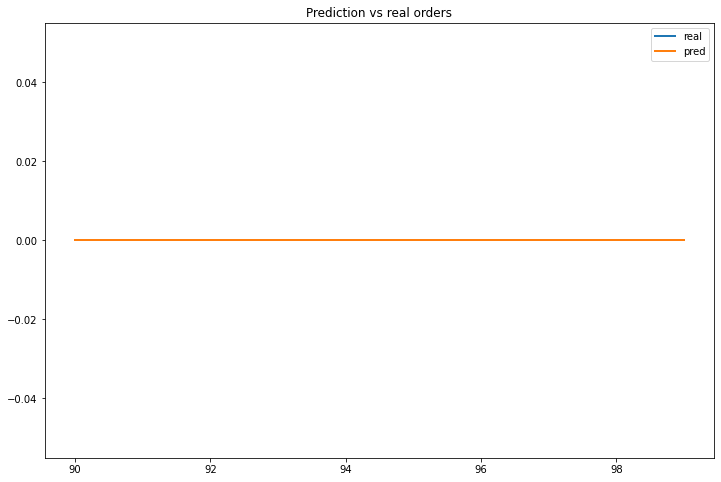

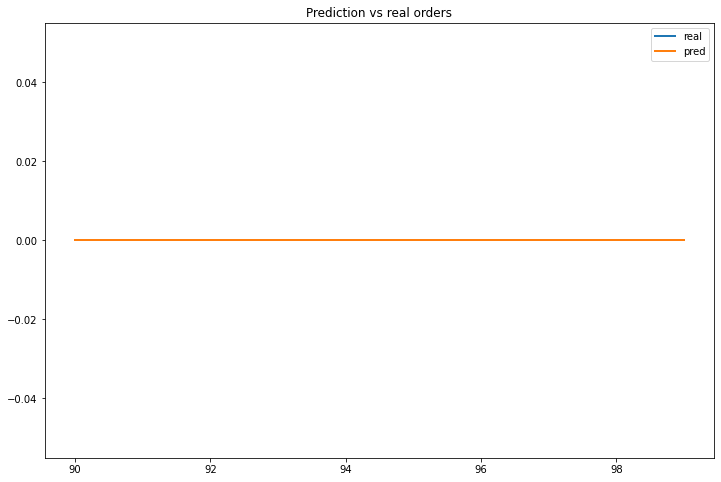

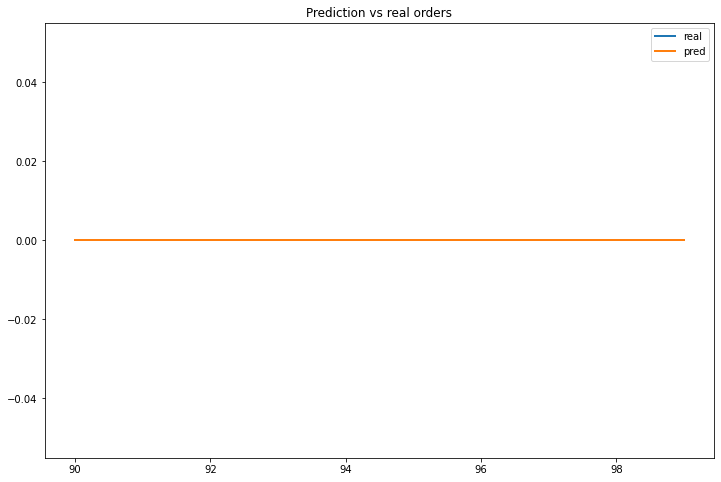

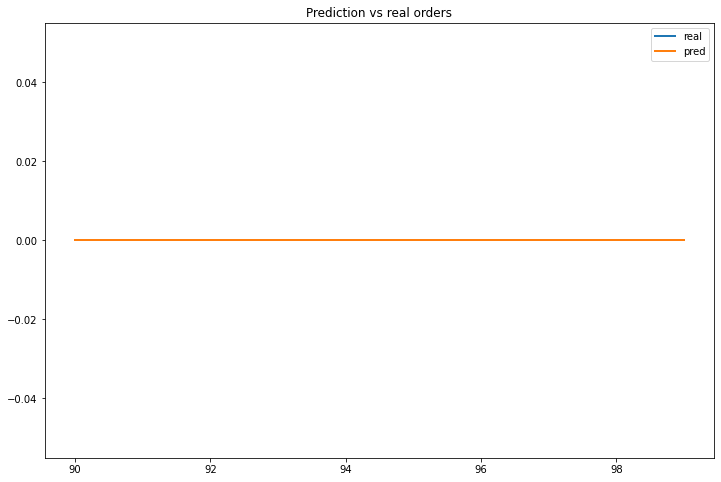

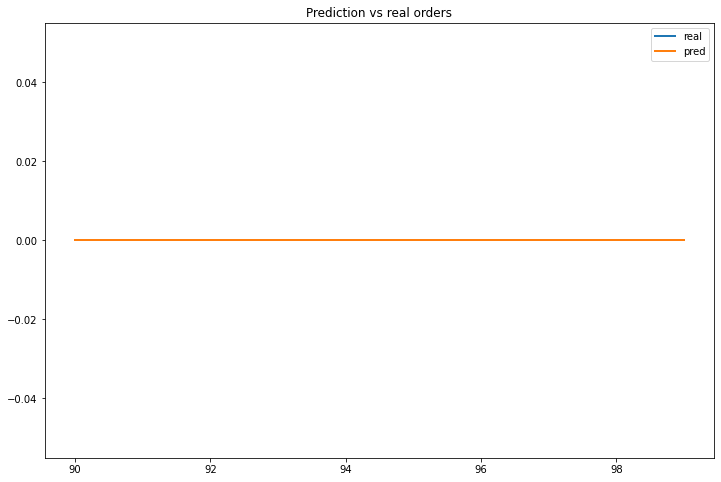

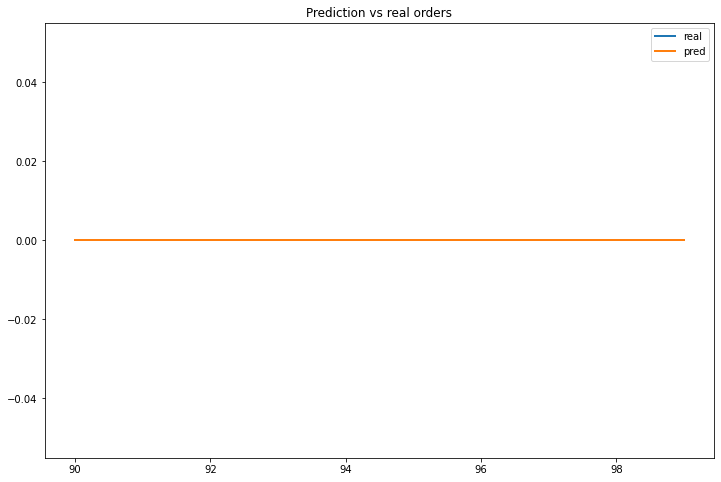

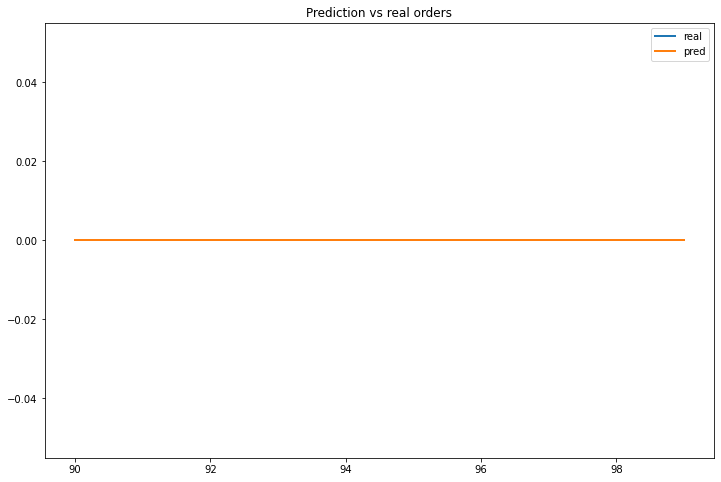

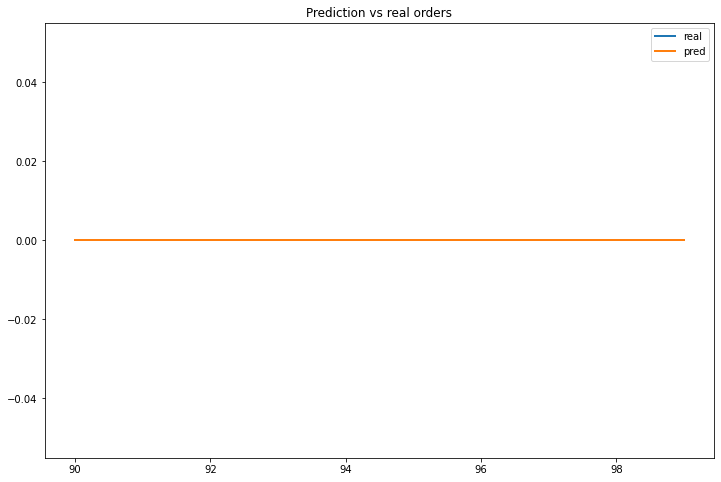

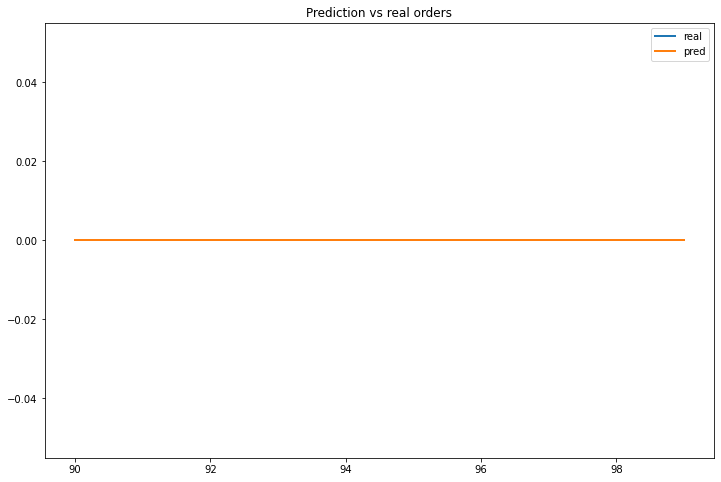

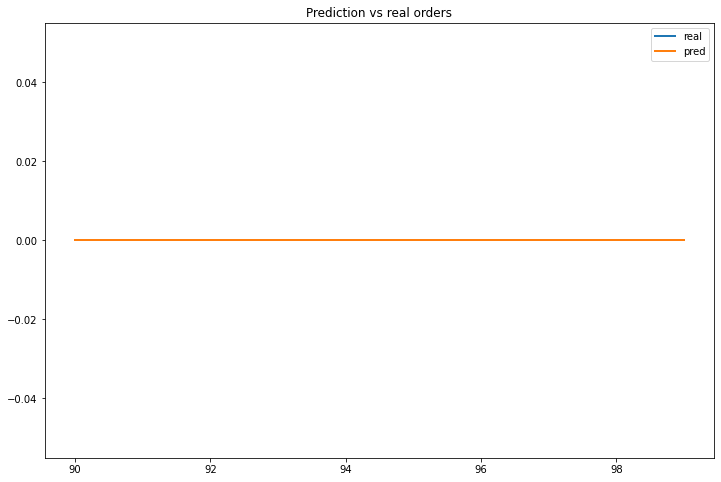

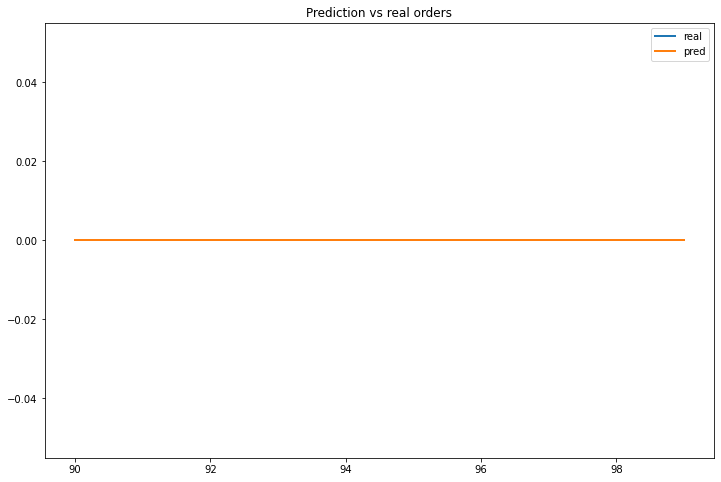

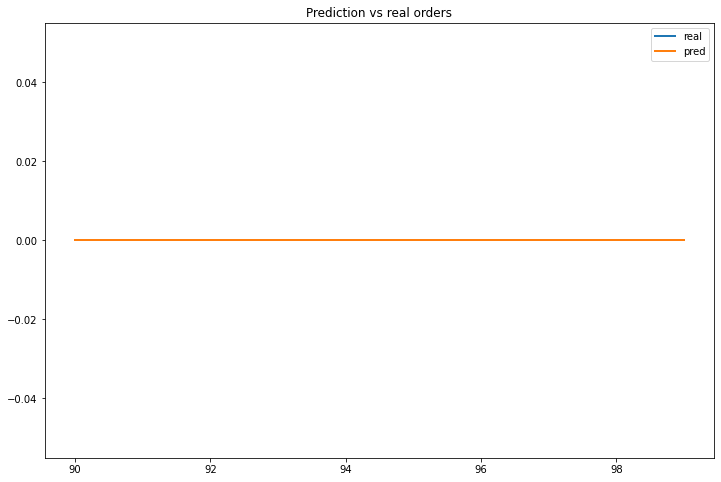

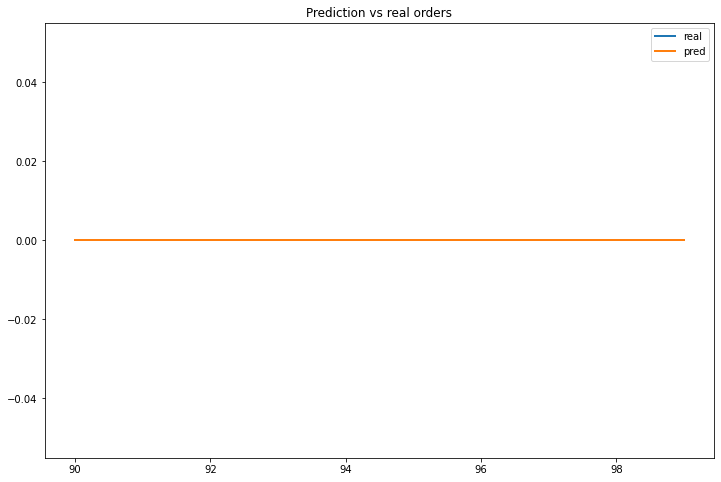

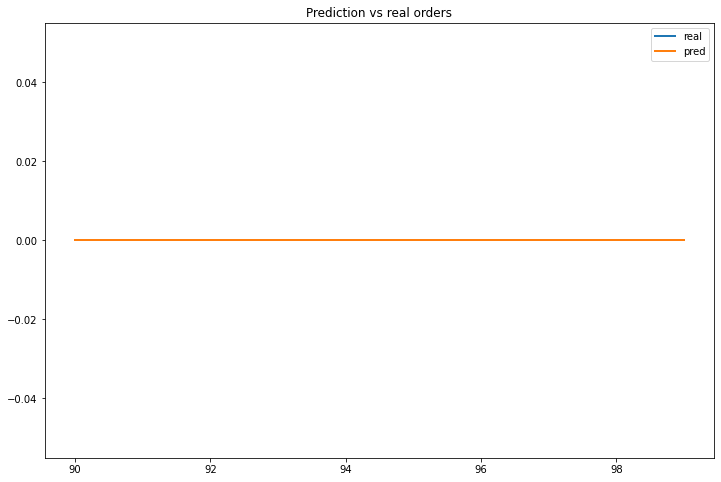

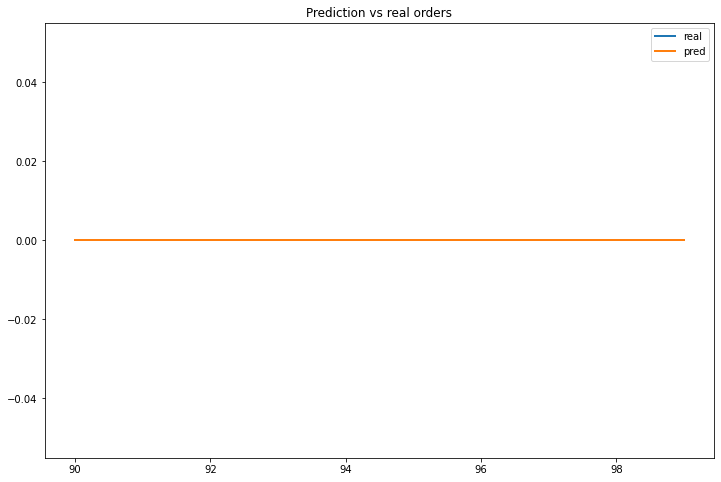

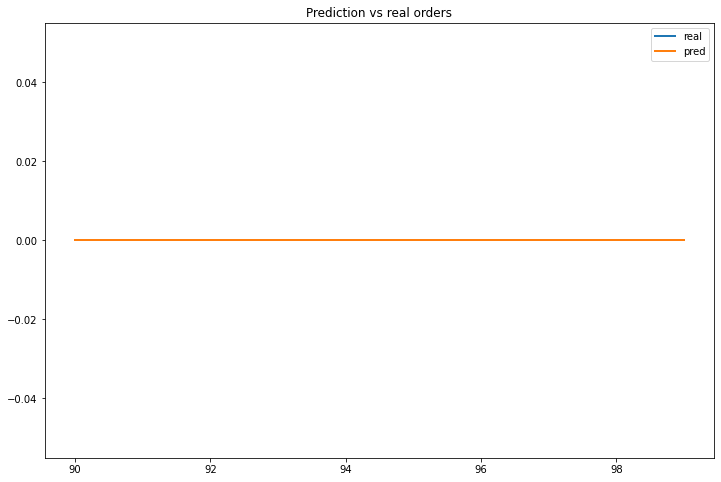

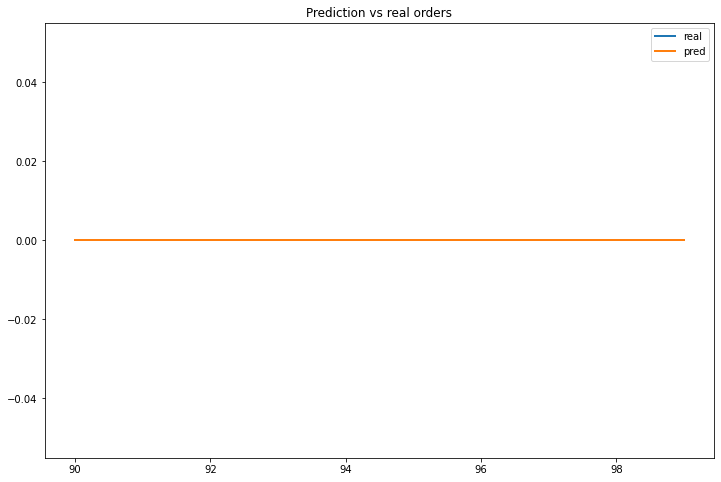

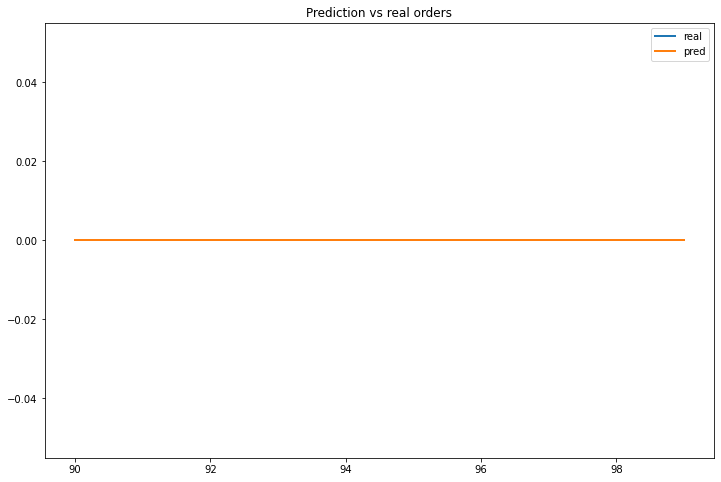

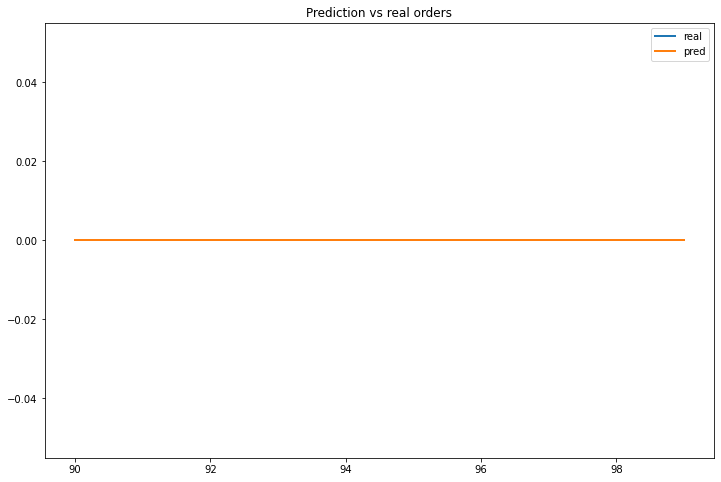

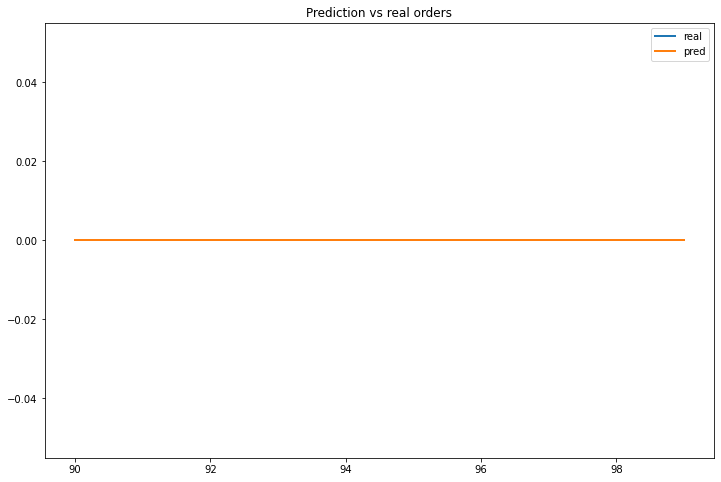

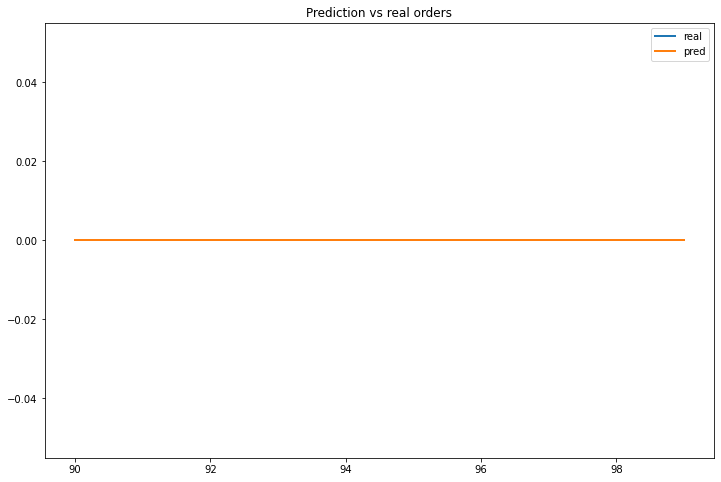

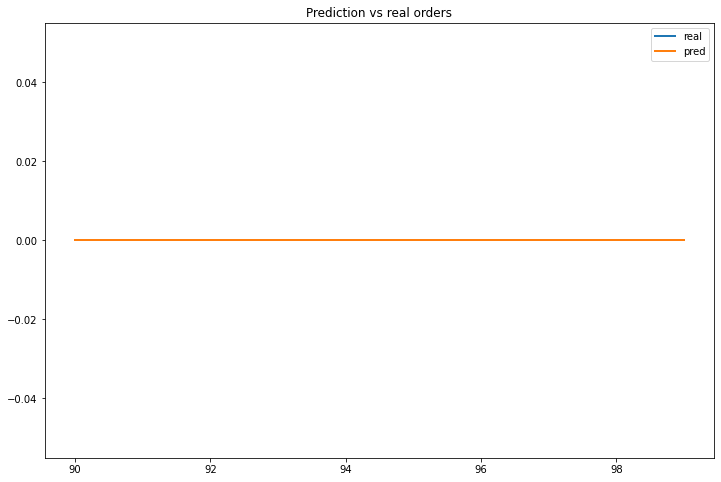

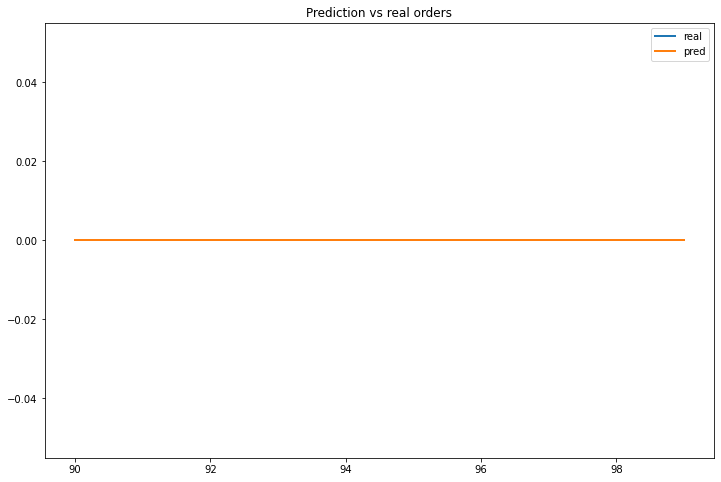

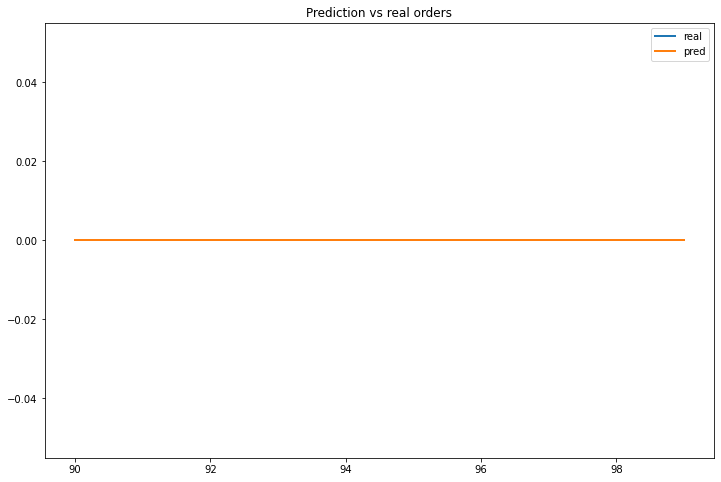

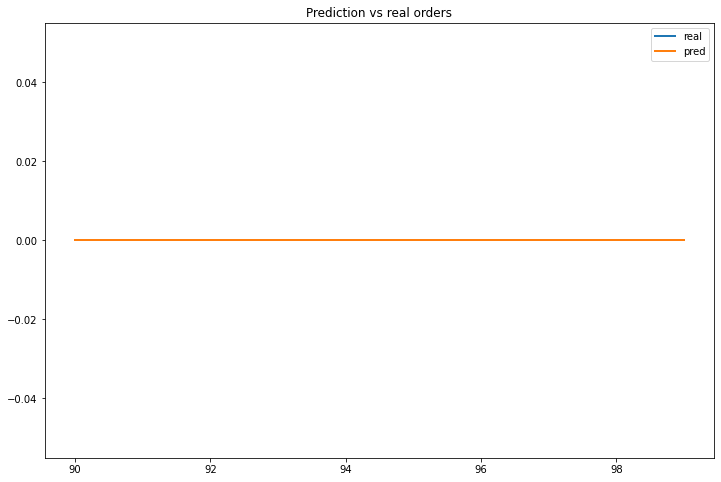

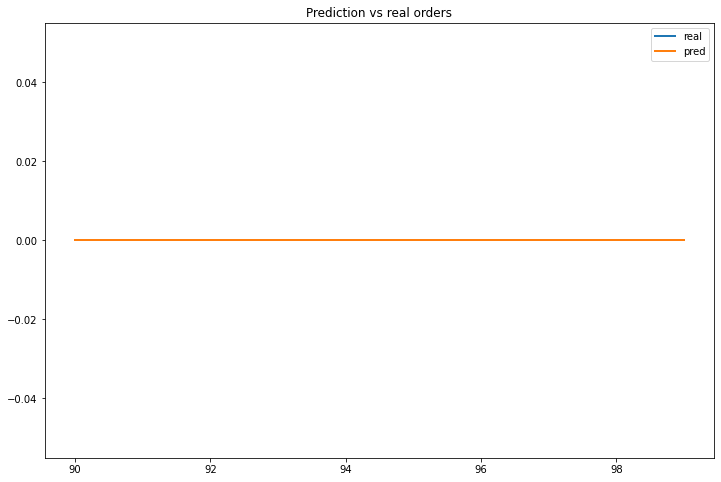

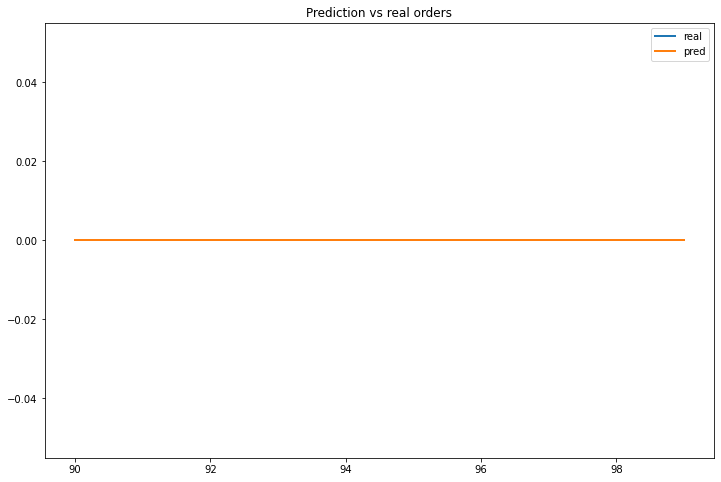

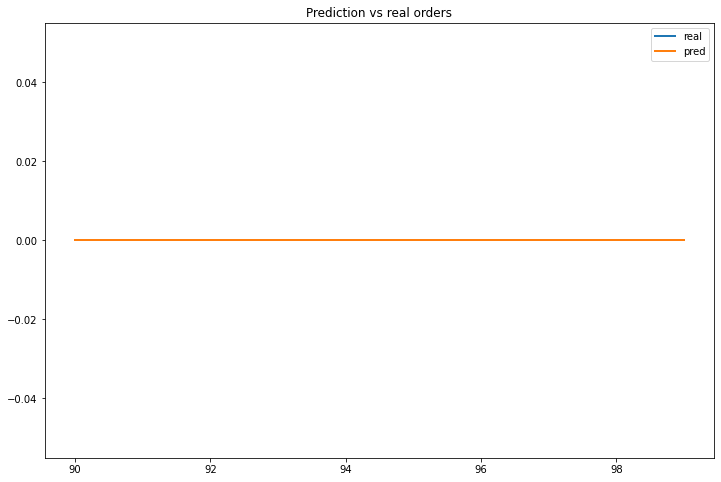

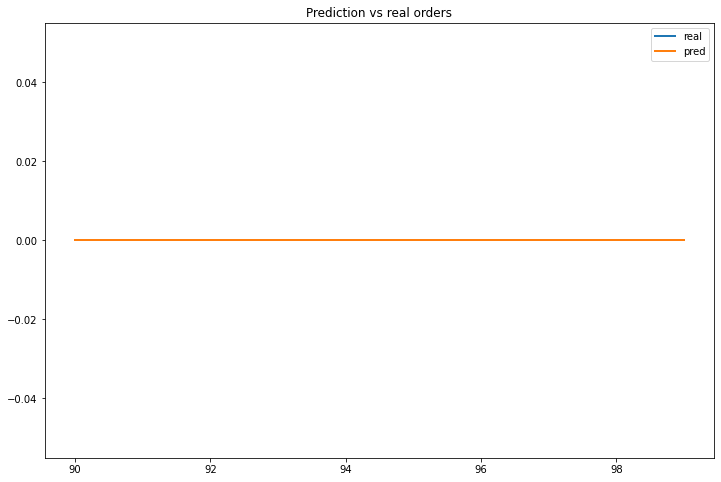

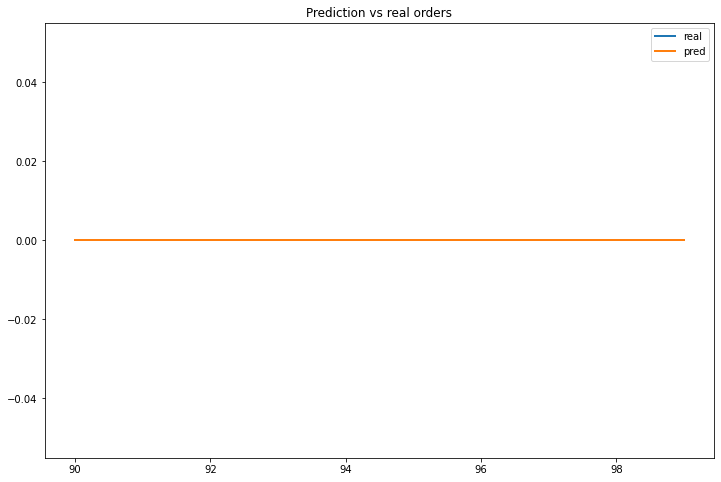

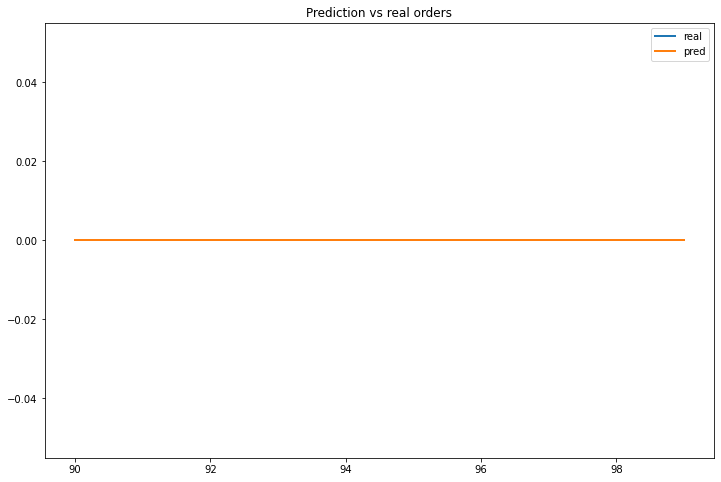

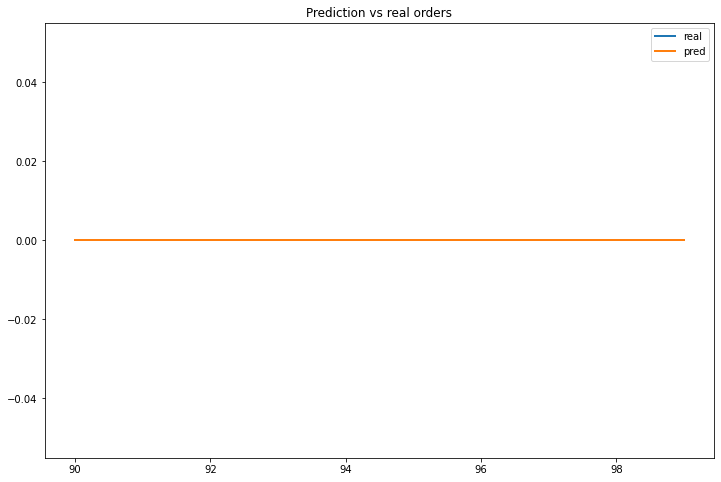

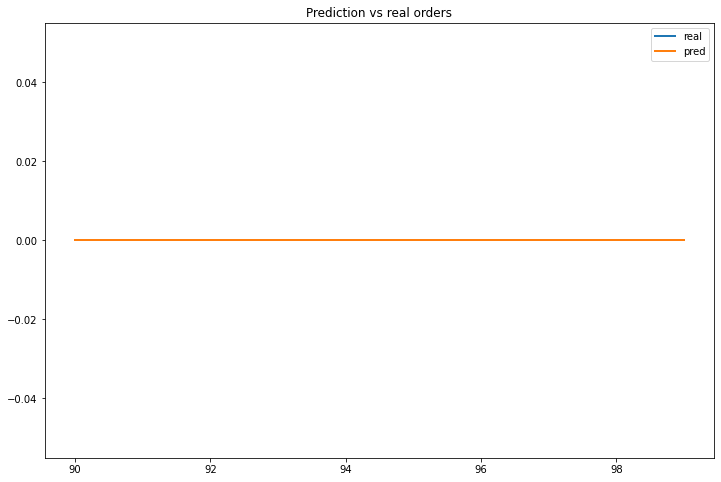

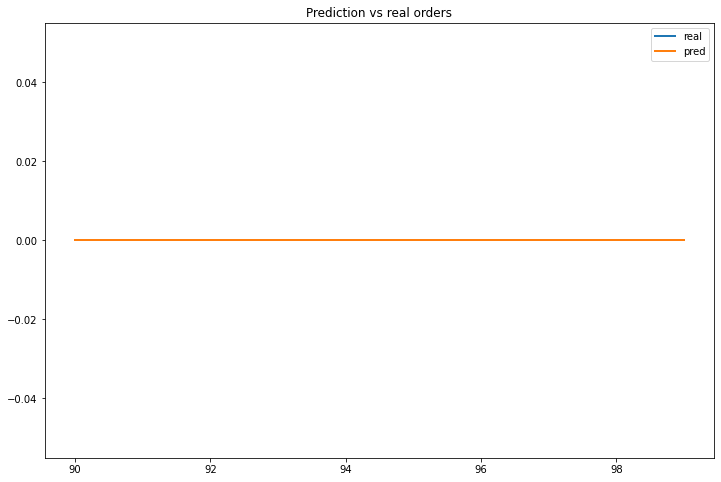

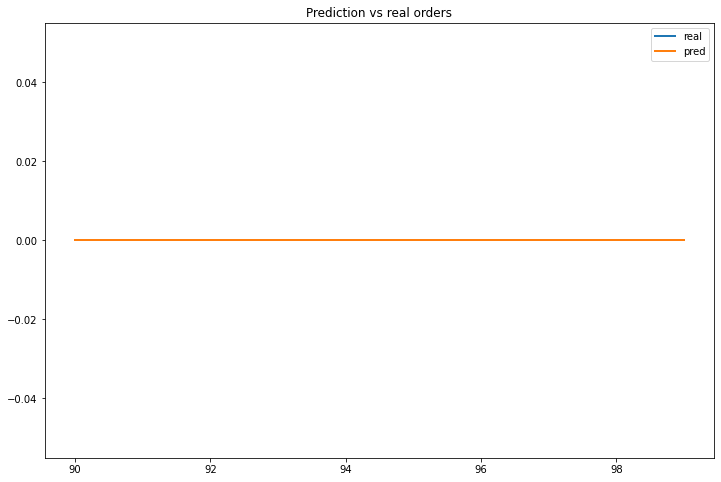

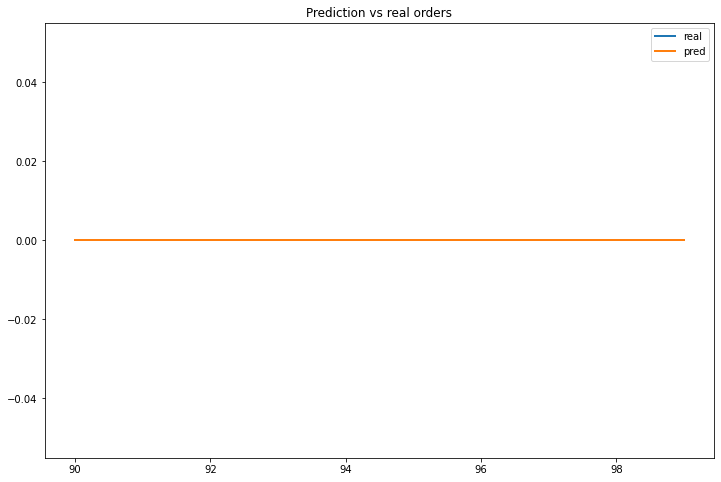

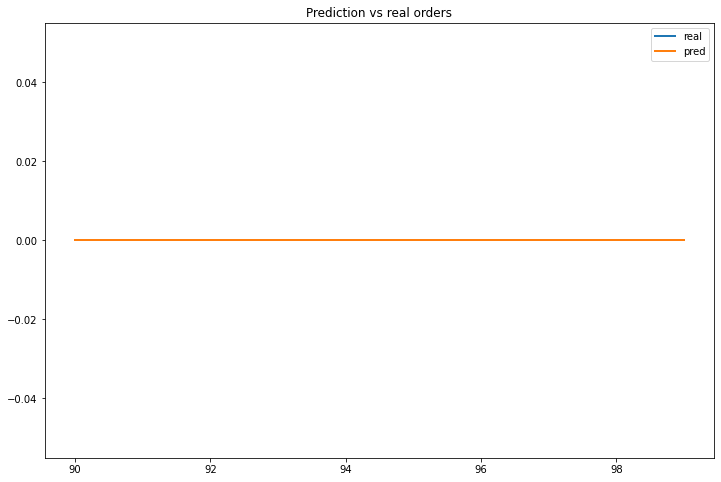

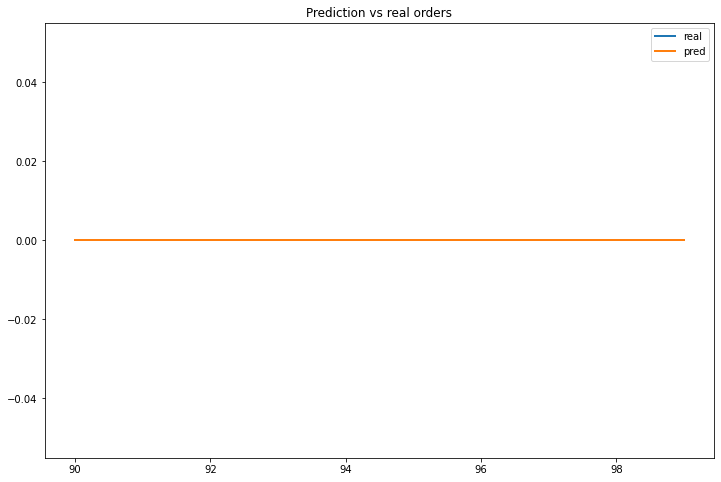

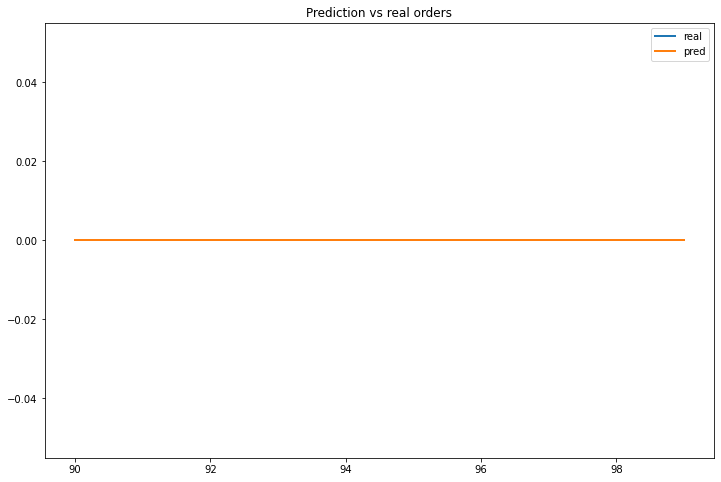

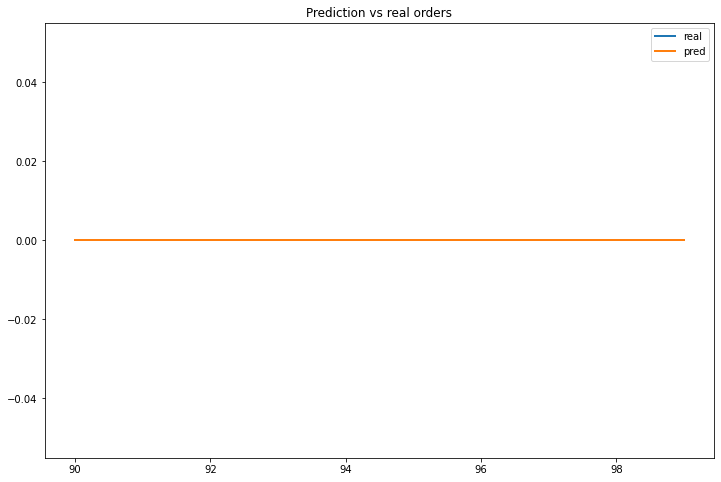

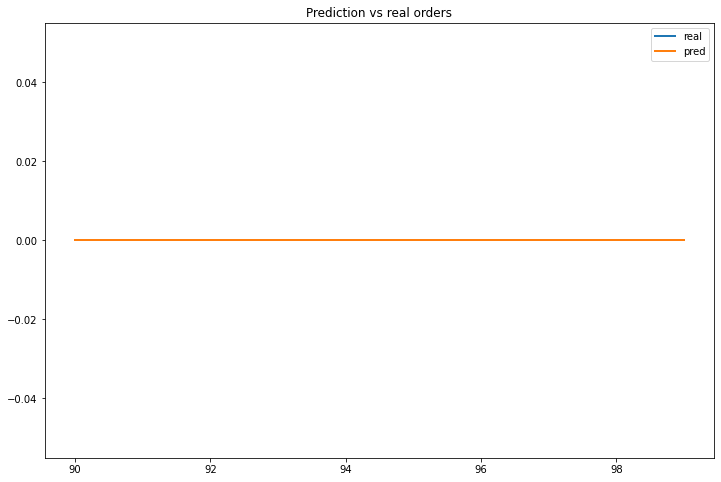

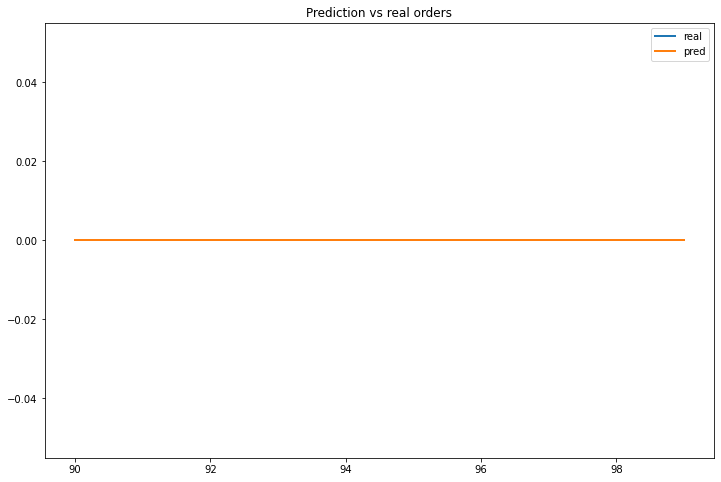

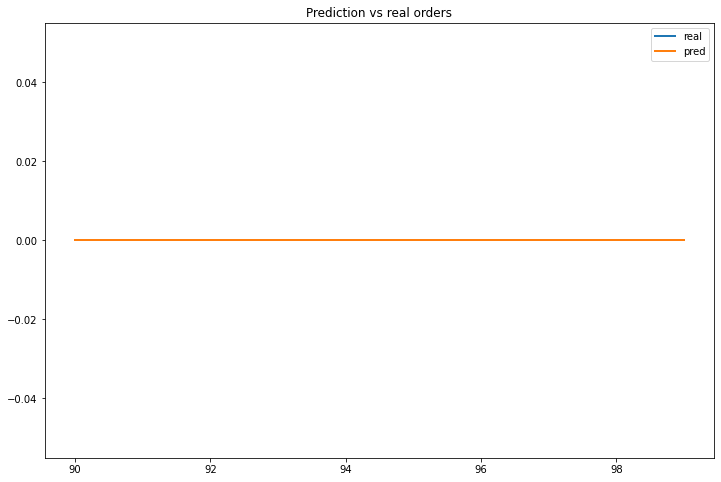

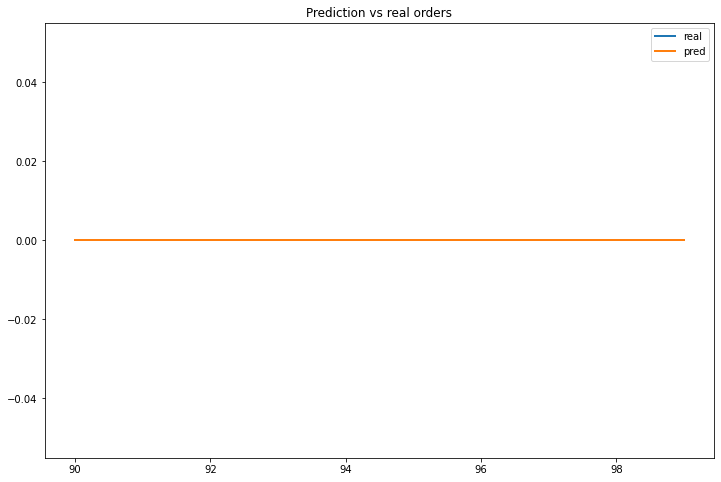

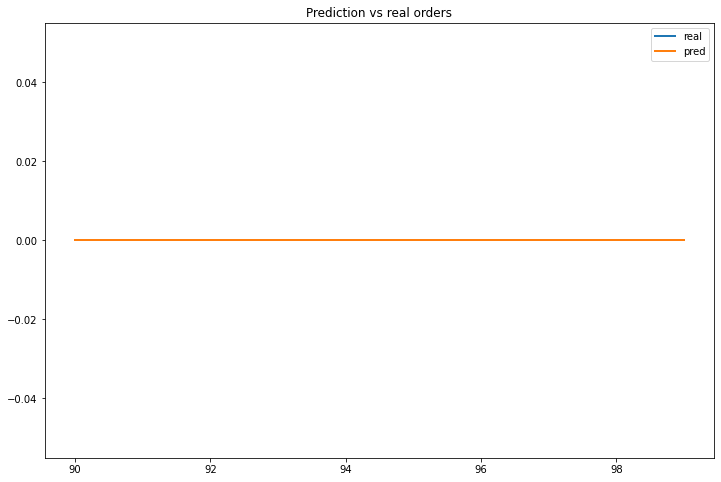

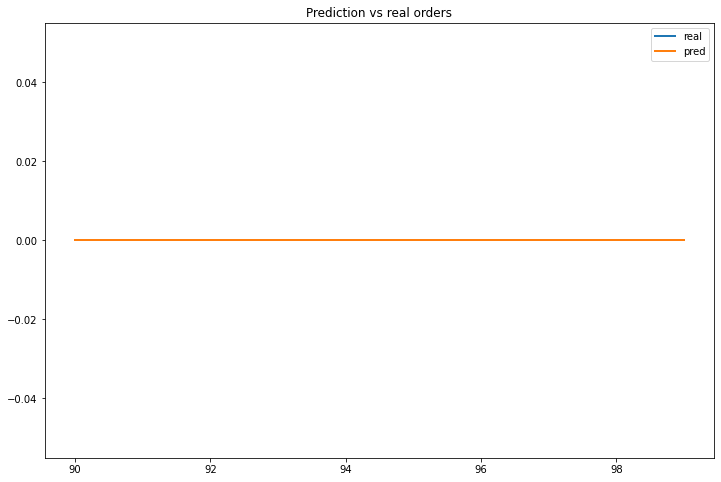

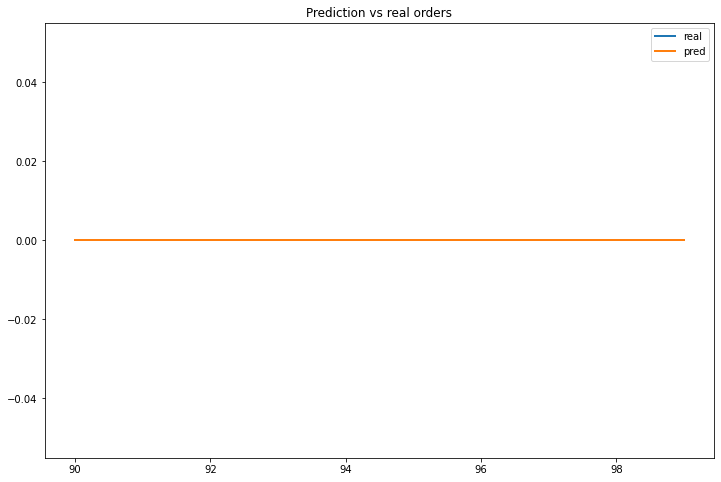

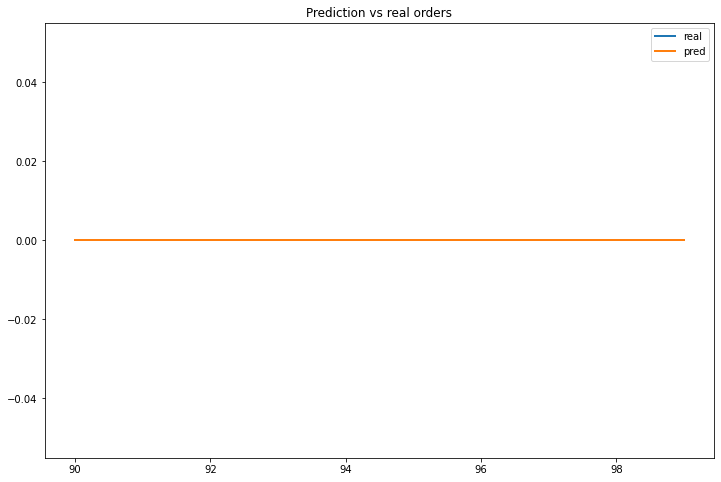

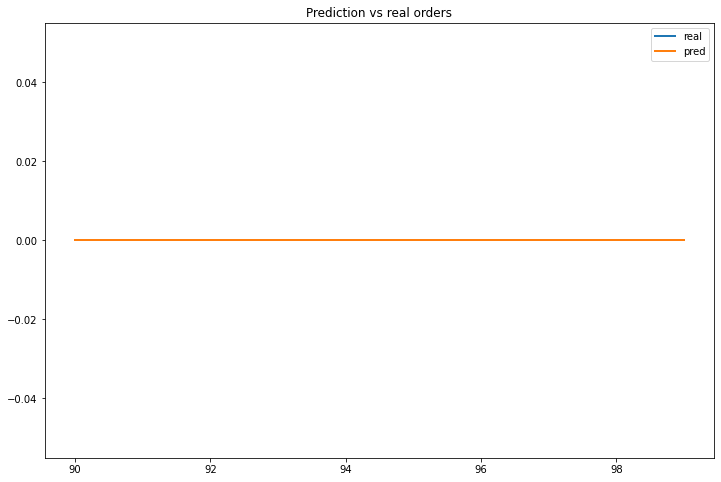

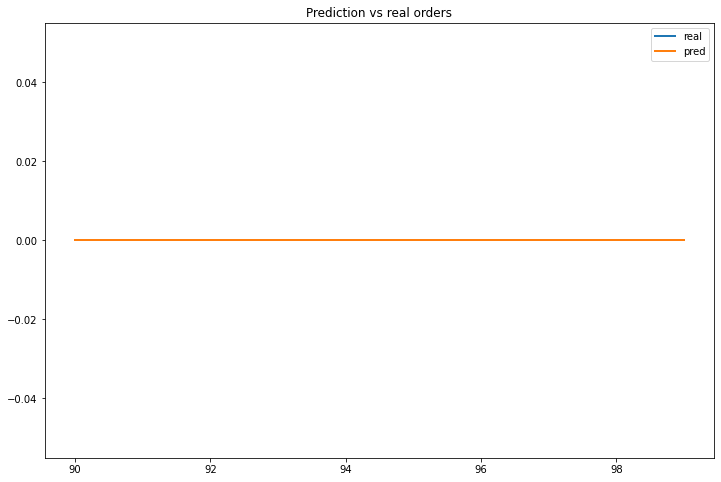

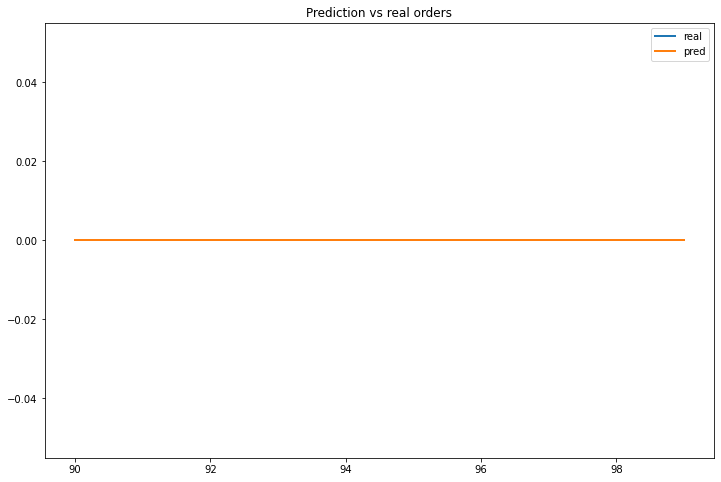

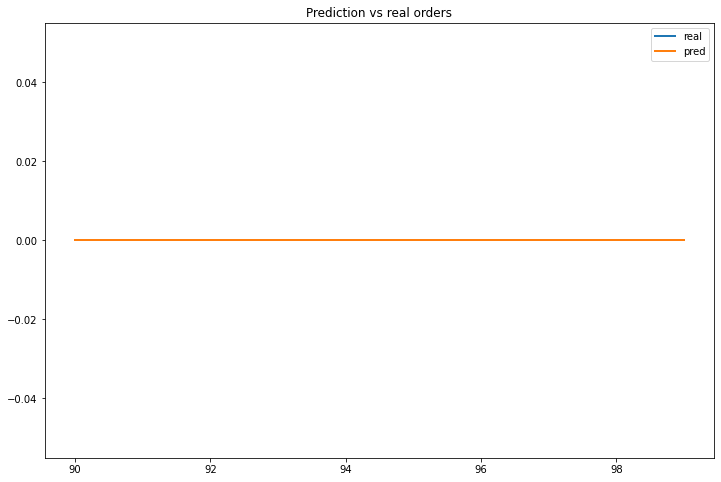

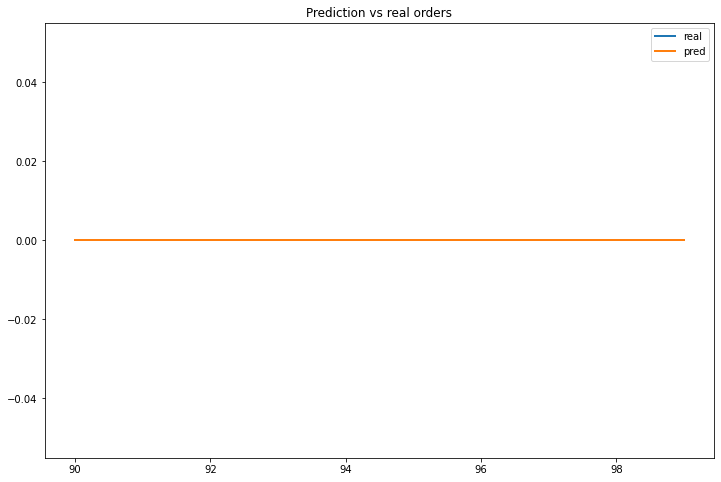

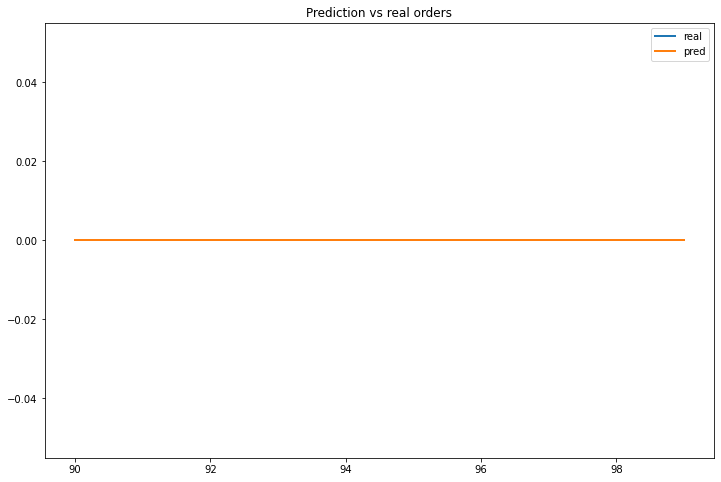

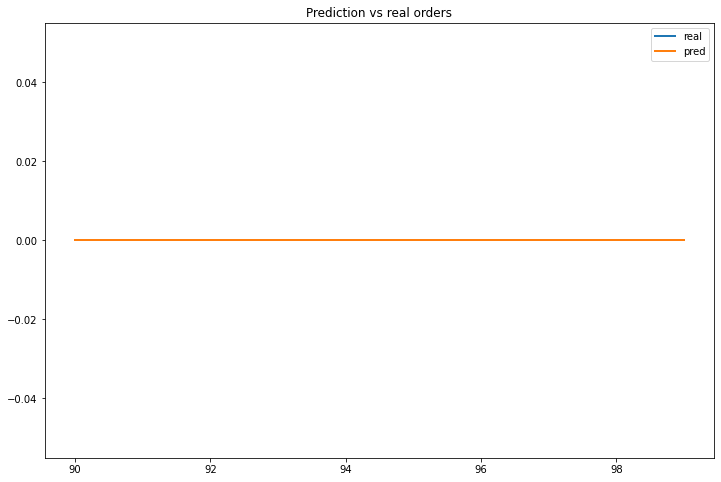

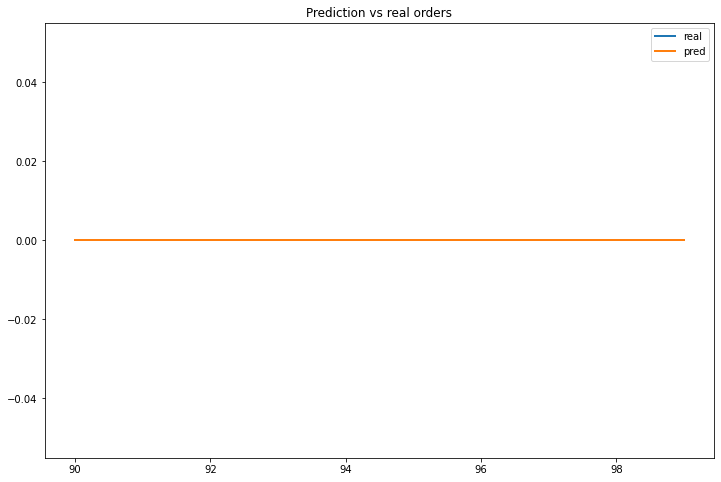

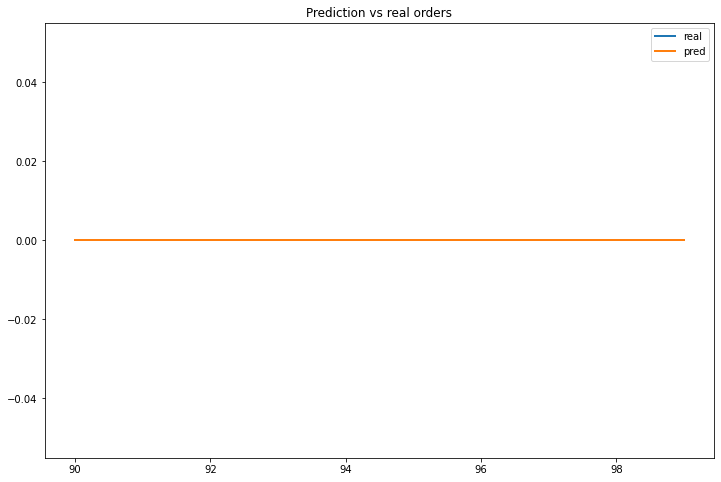

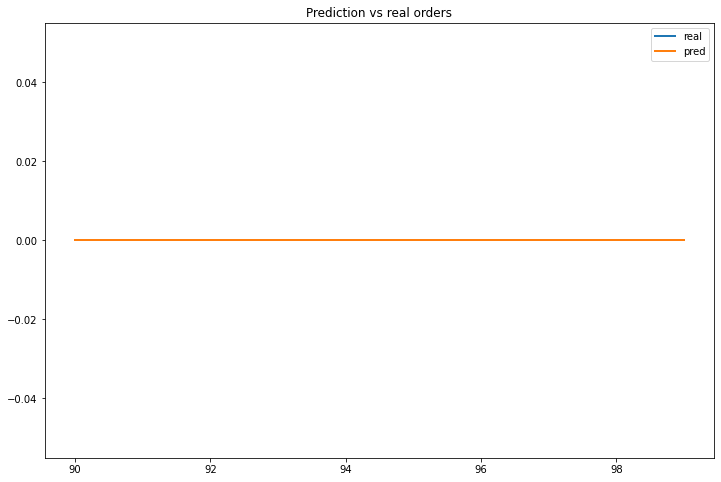

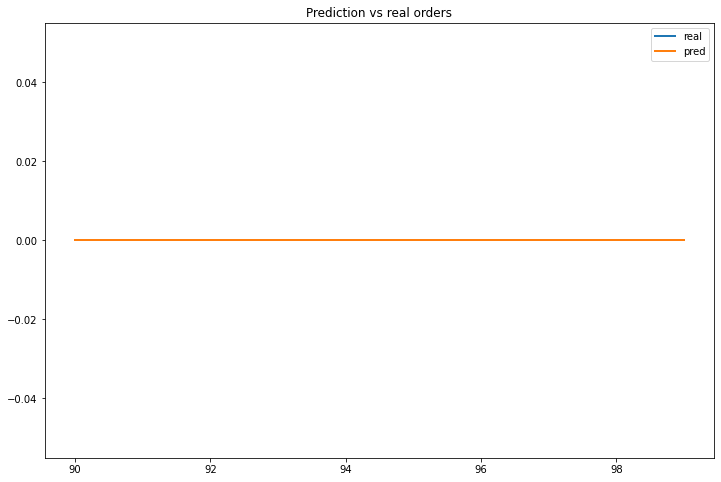

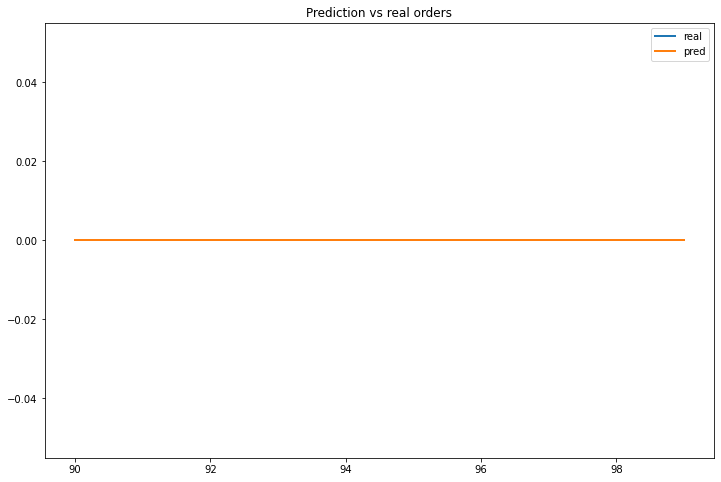

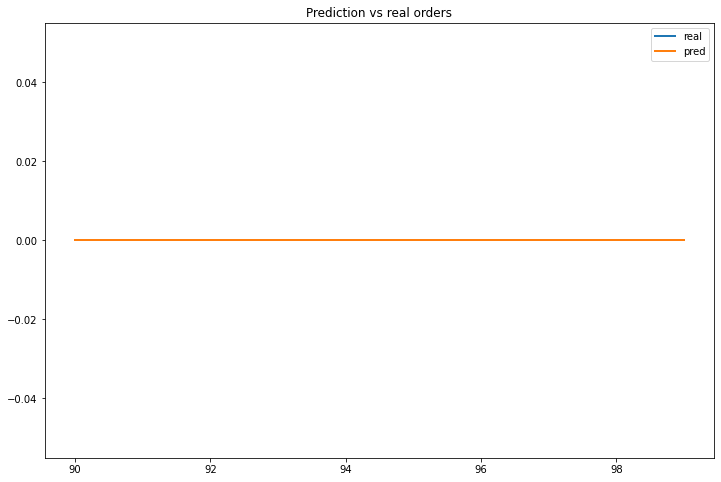

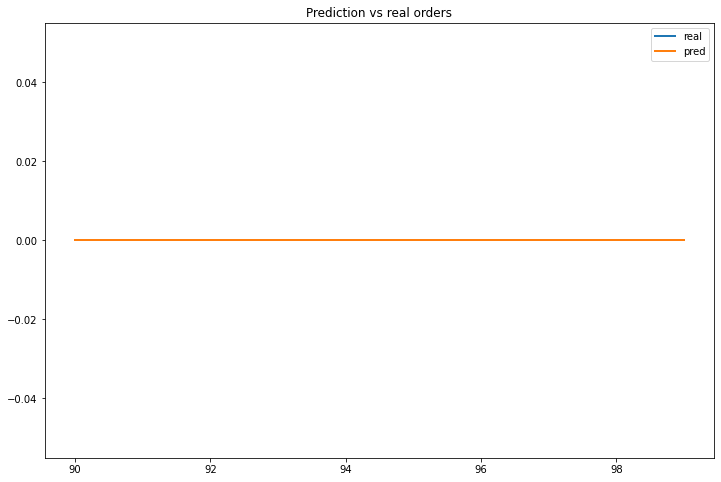

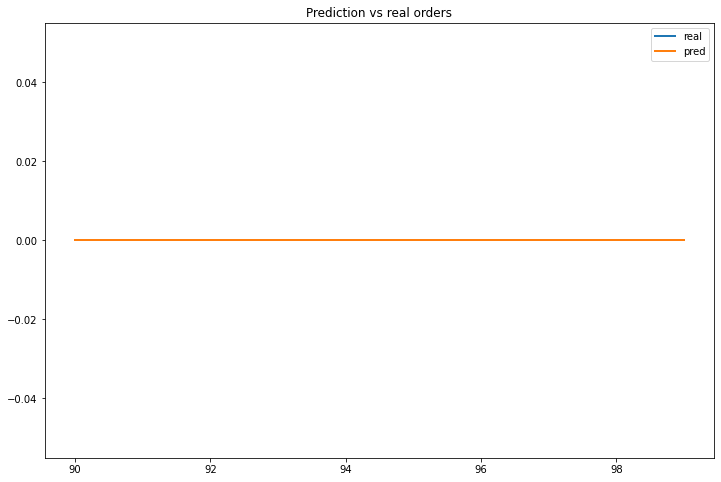

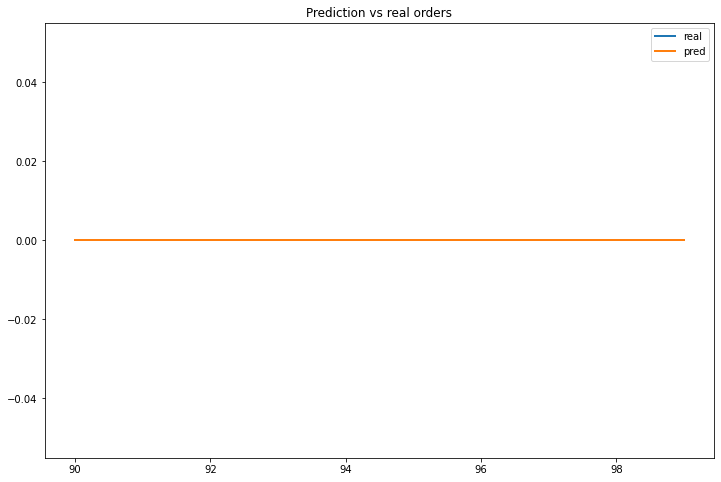

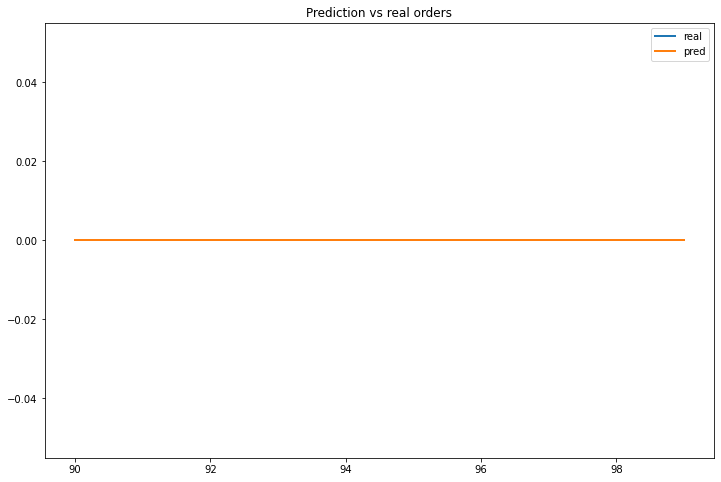

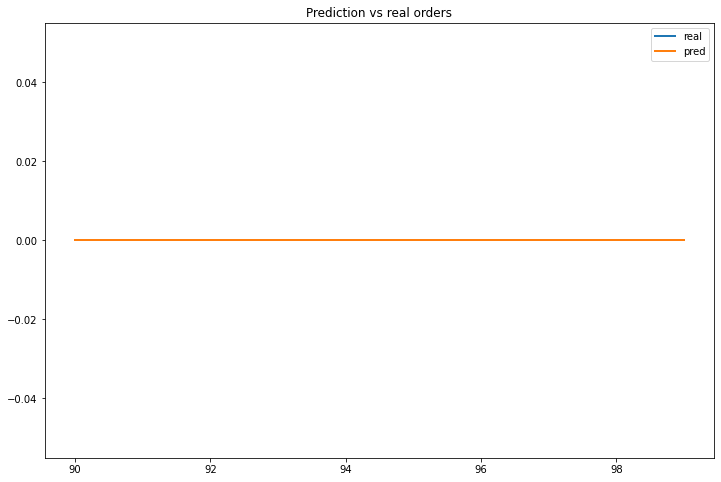

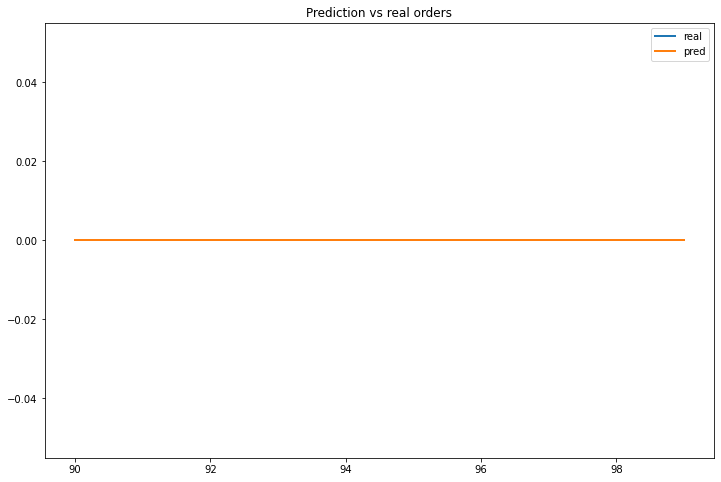

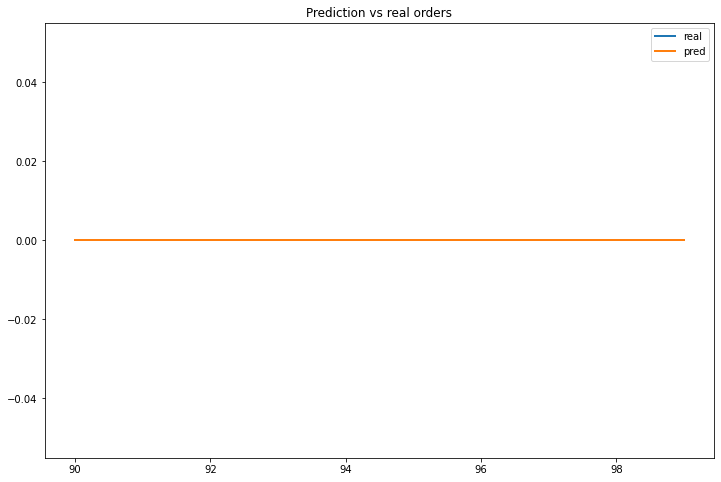

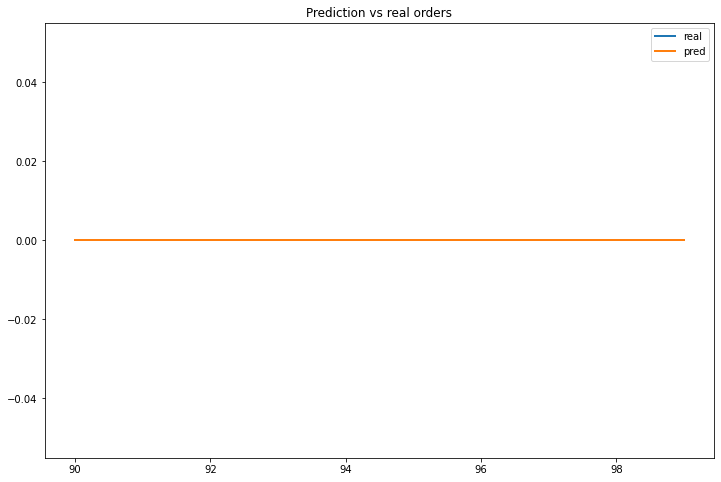

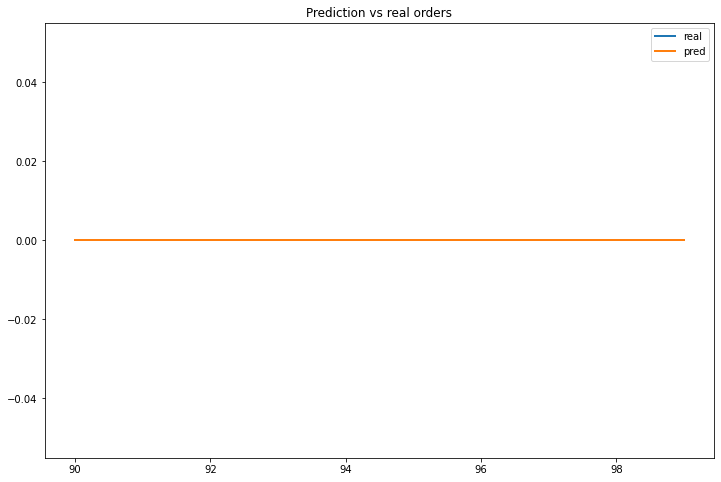

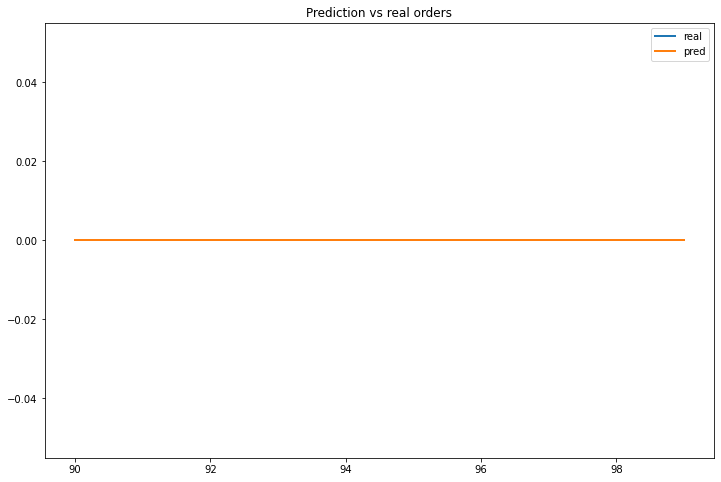

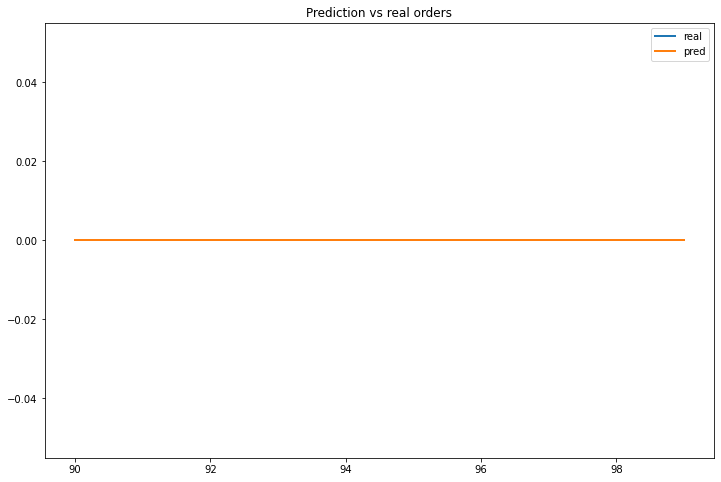

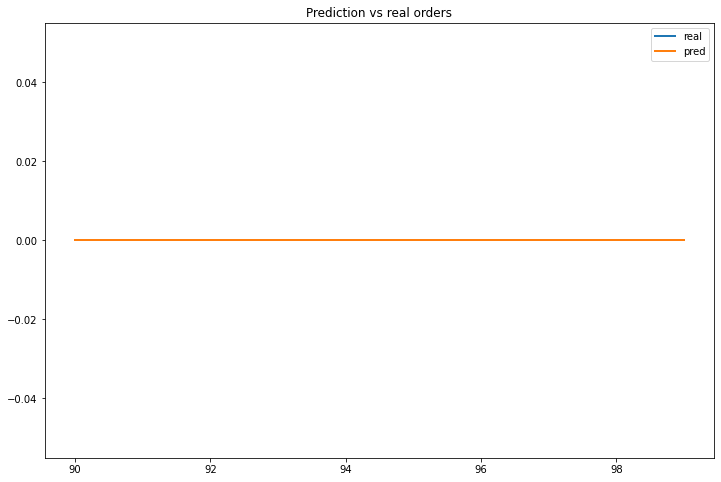

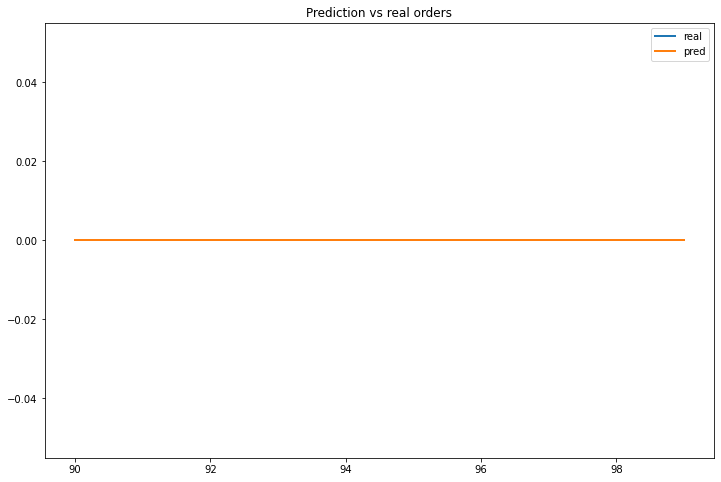

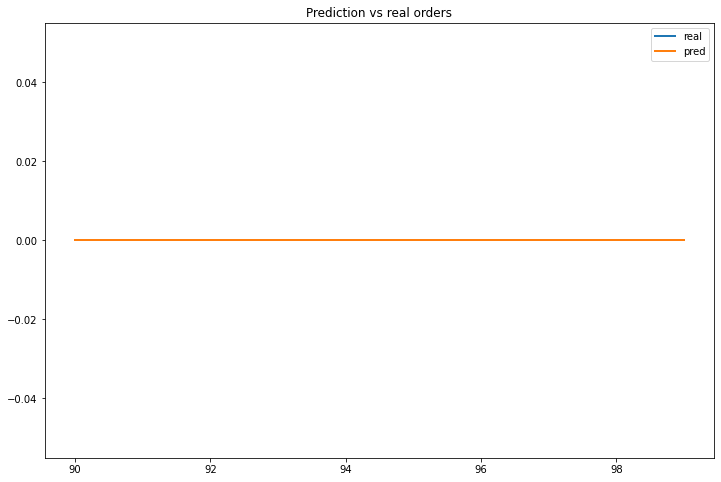

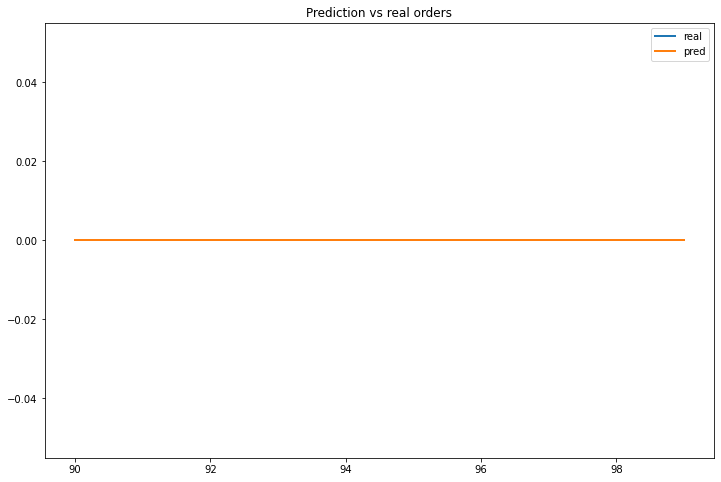

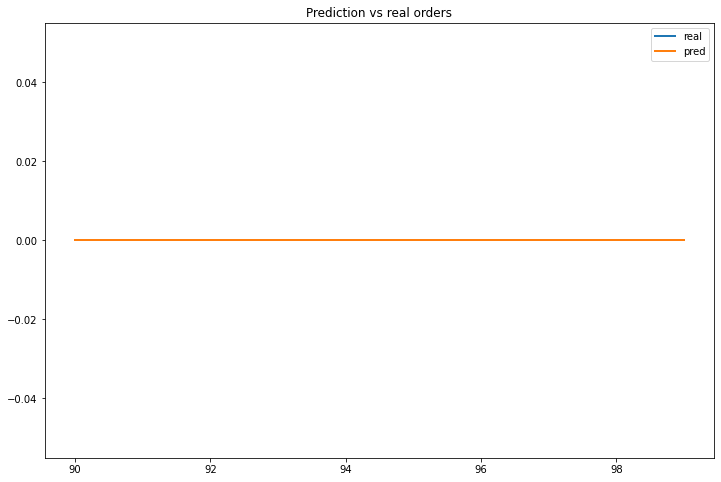

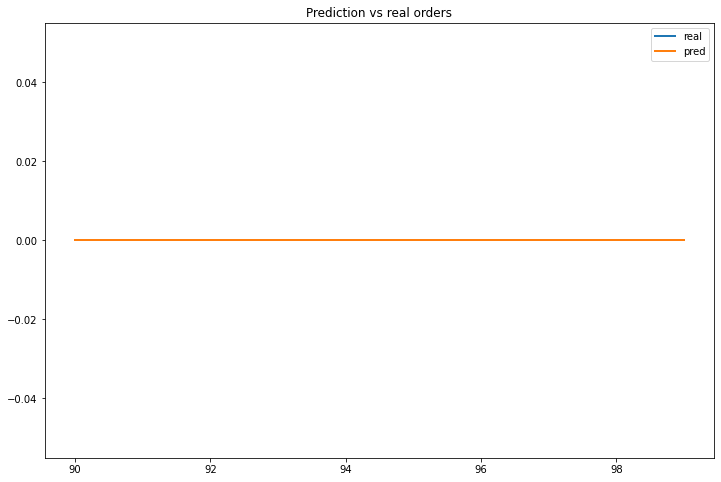

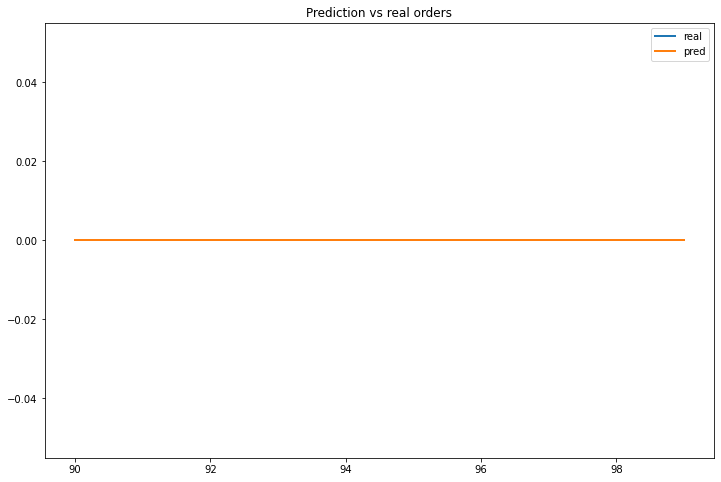

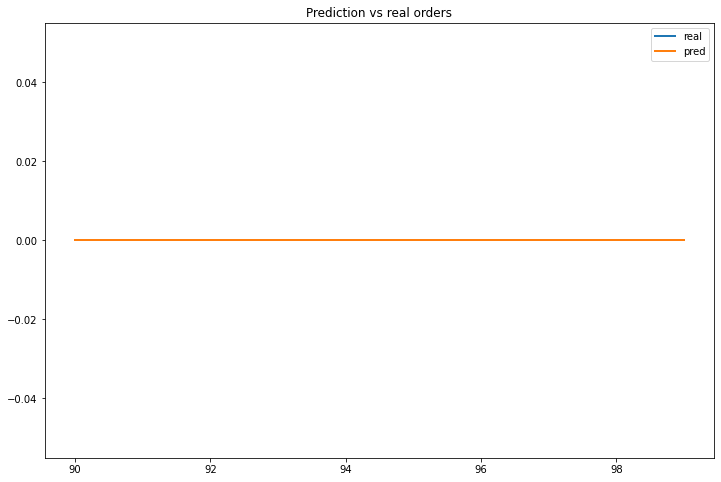

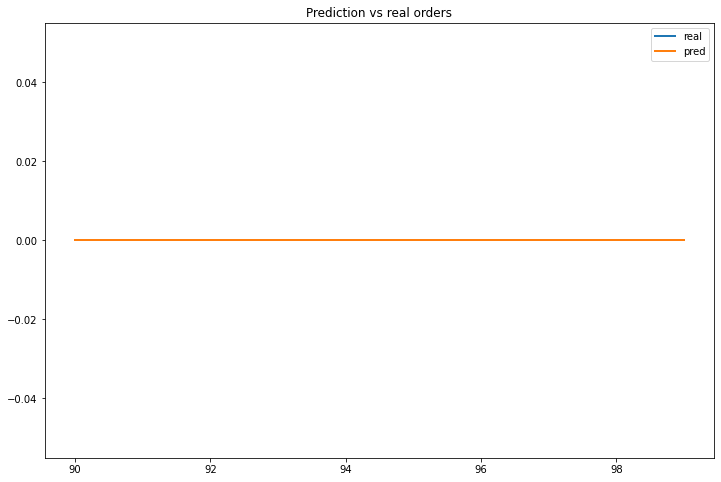

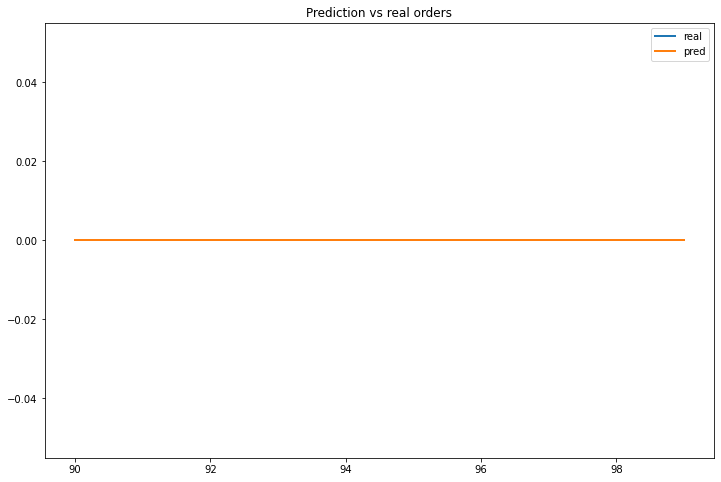

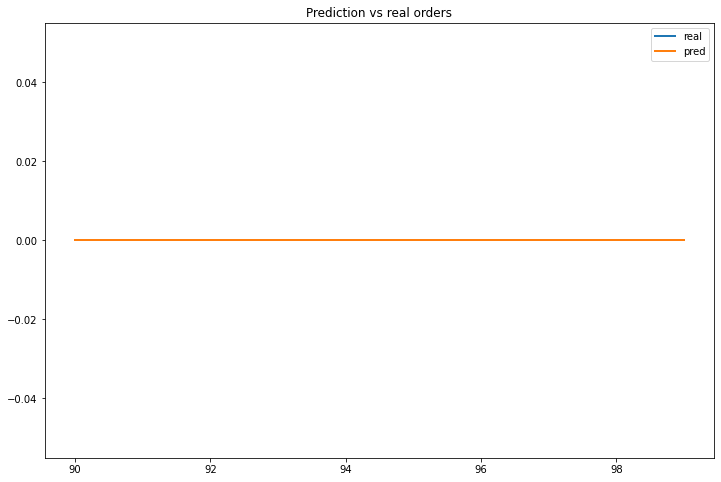

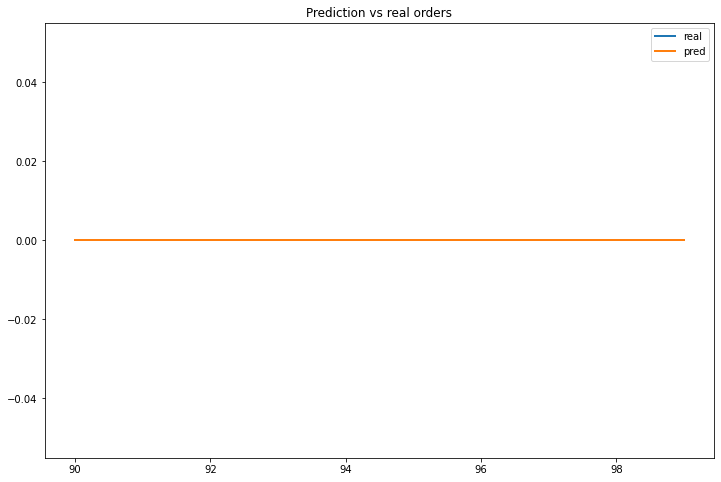

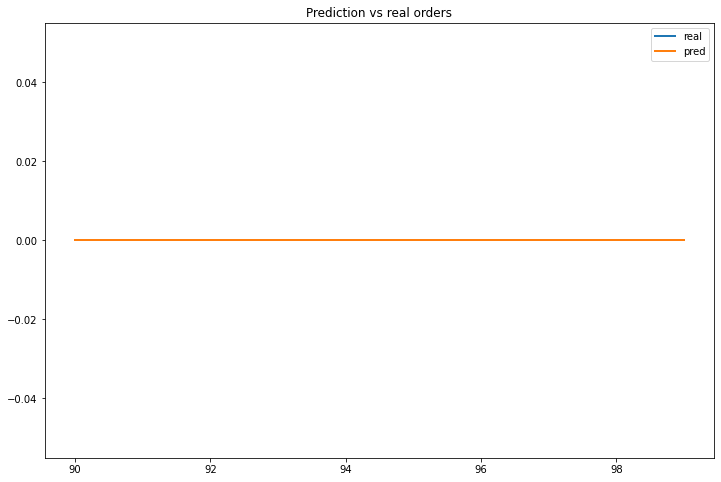

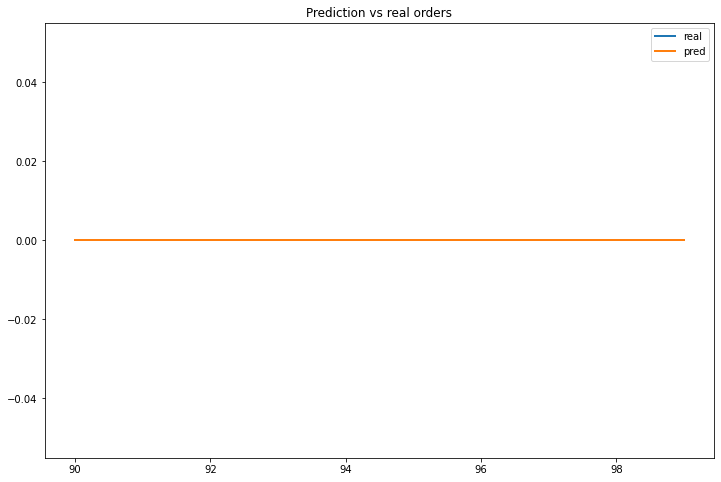

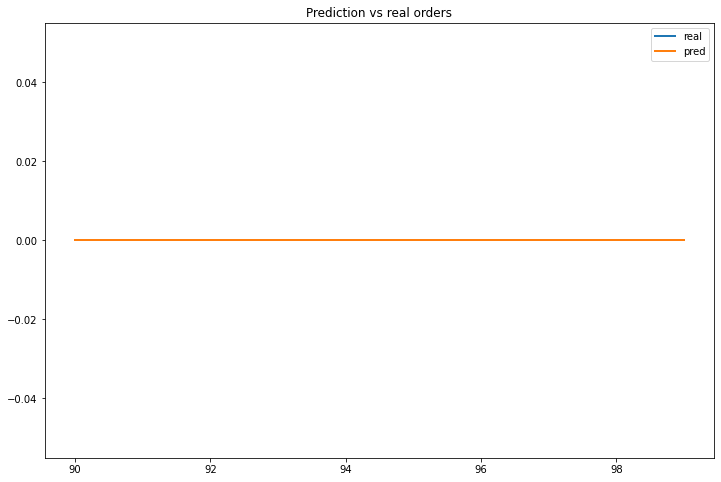

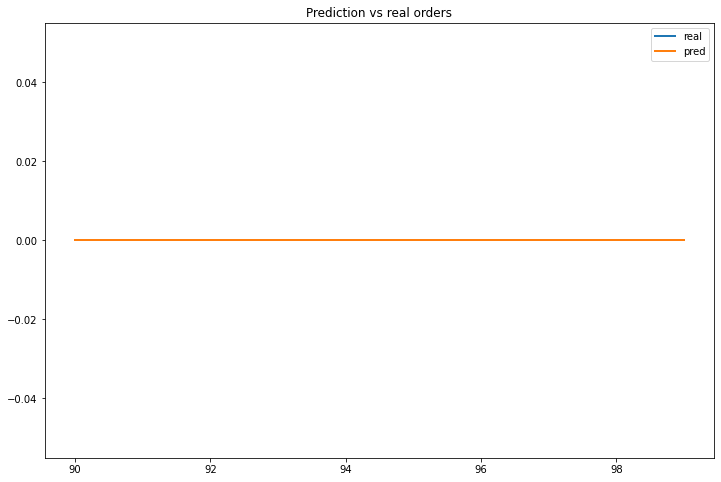

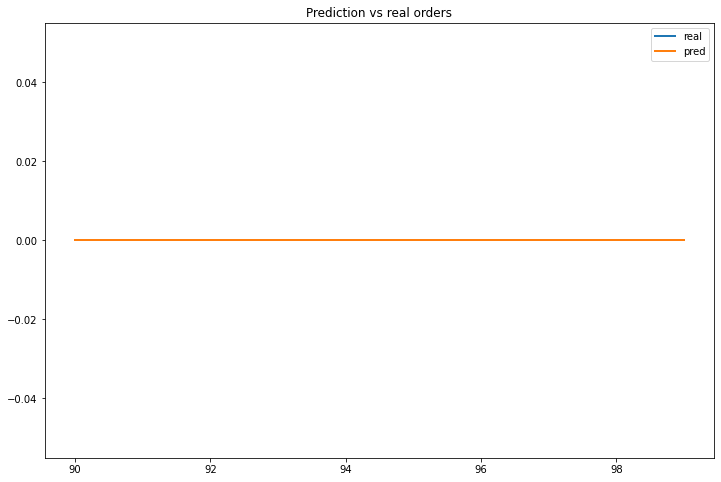

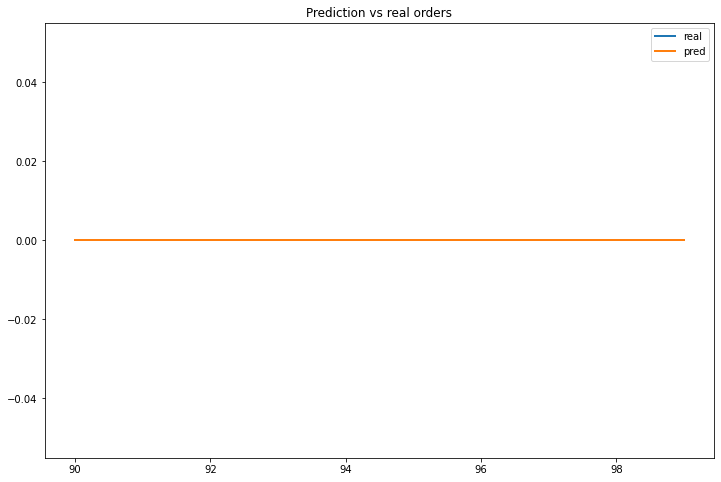

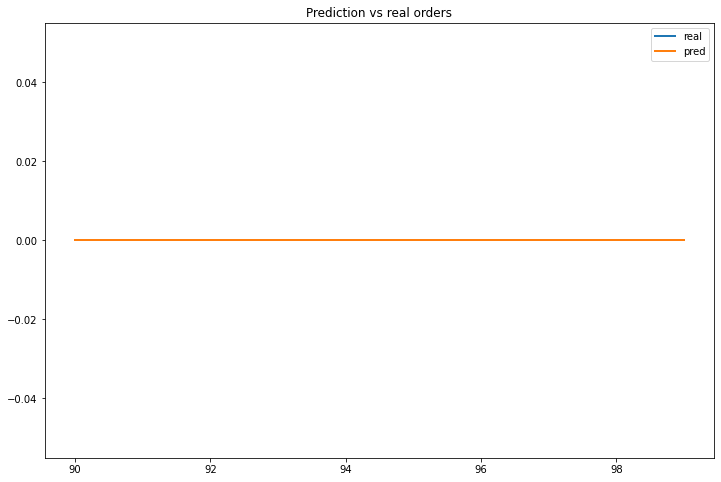

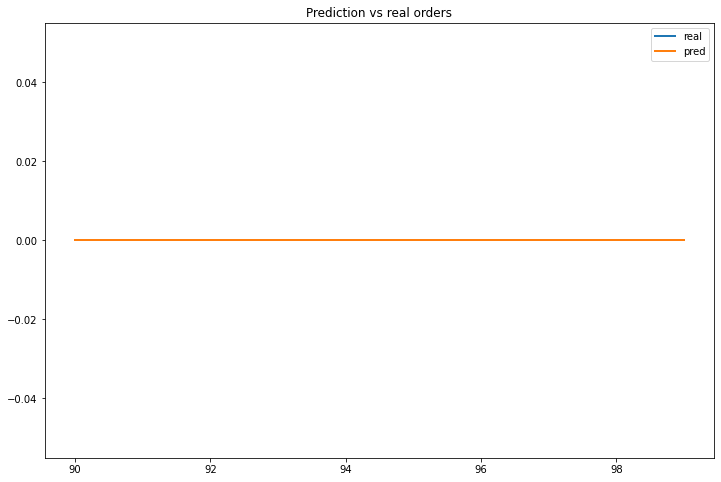

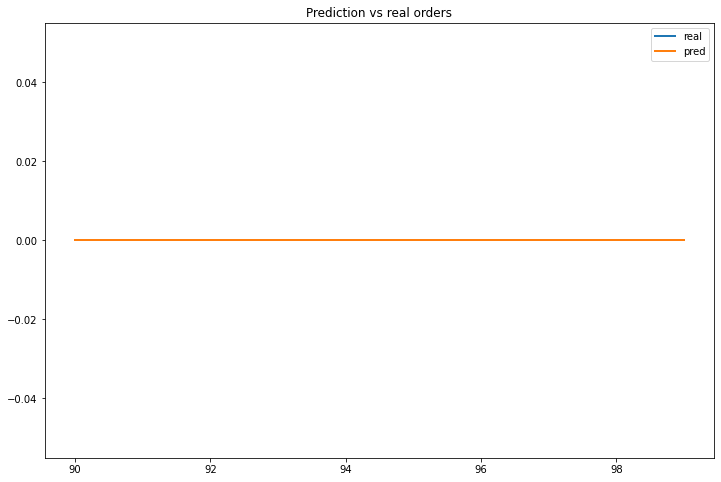

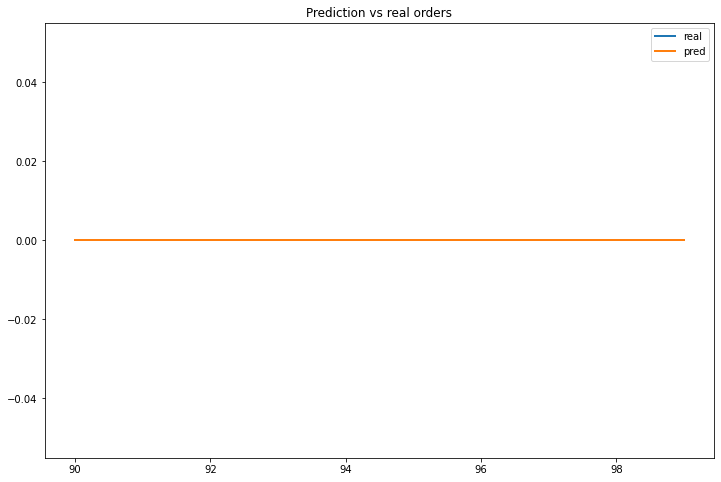

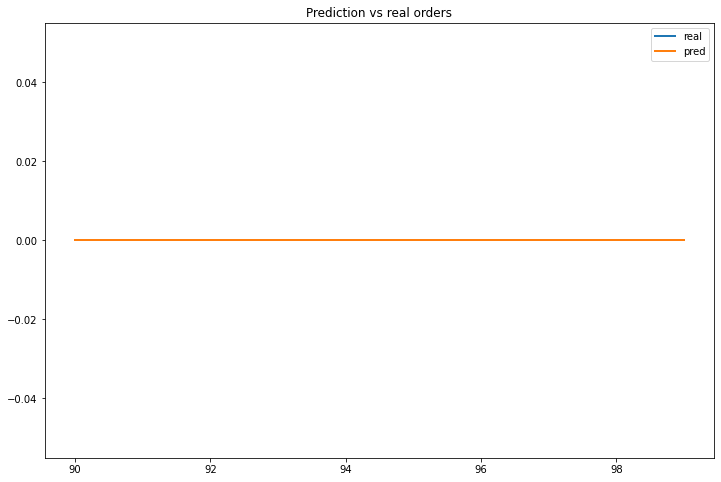

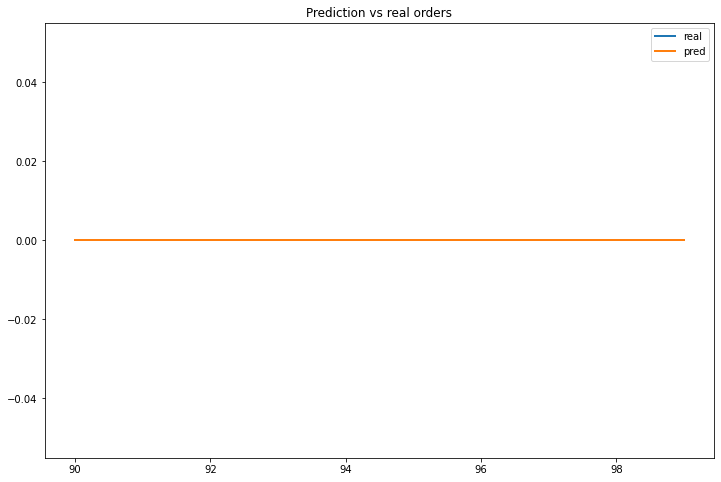

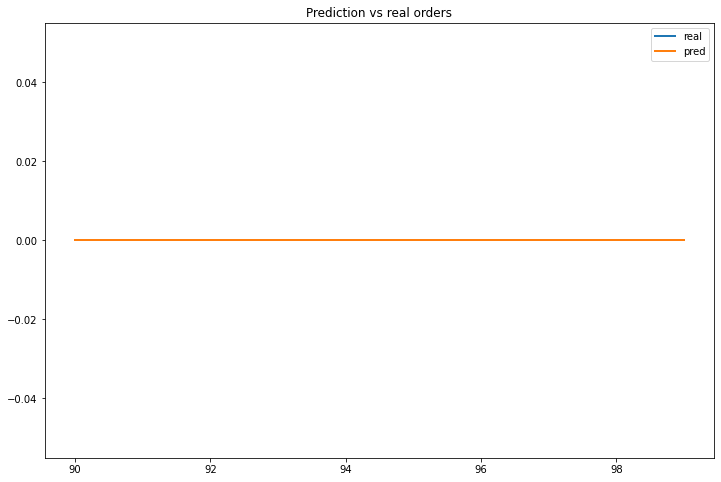

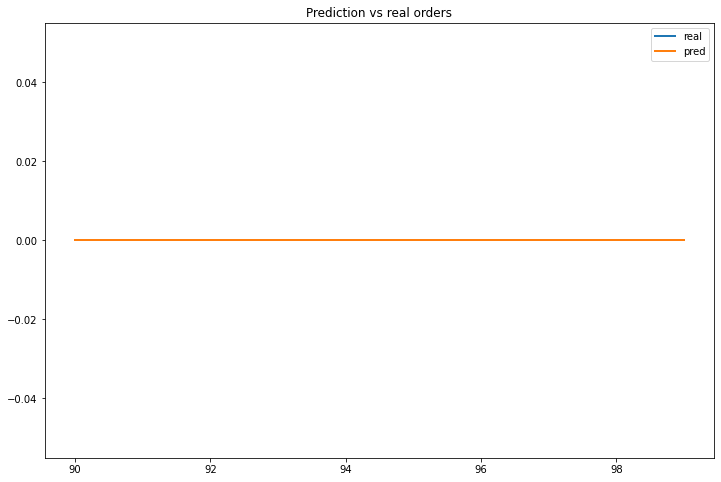

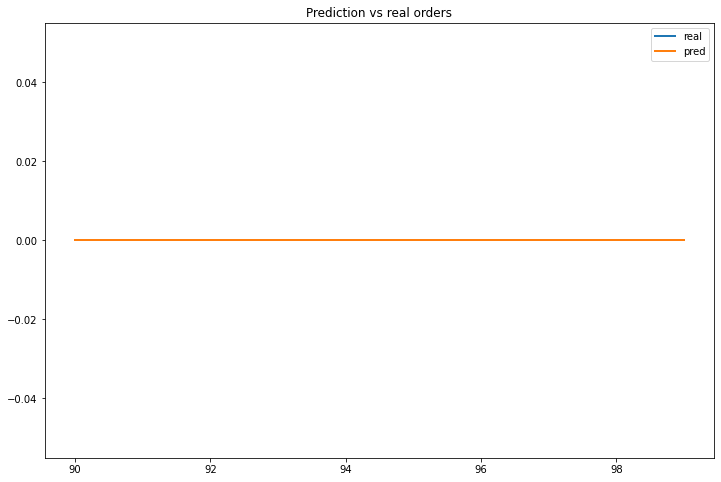

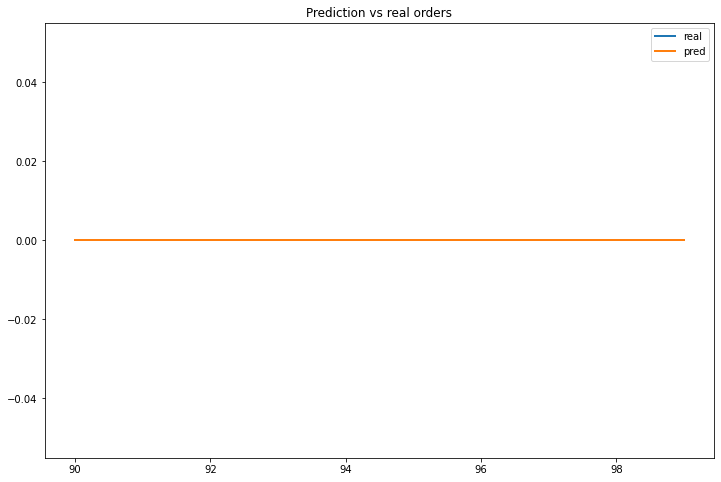

In [7]:




from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import sched, time
import joblib
#from airflow.providers.postgres.hooks.postgres import PostgresHook

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.df = datasetttt
        self.model_fname_ = 'model.pkl'
        
    def read_data(self):
        global ar
        
       
        ar = []
        global pred
        pred = []
        global datasetttt
        global datasetlen
        global end_validation
        global end_train
        datasetlen = 1000
        end_validation = 976
        end_train = 800
        global l
        l = datasetlen - end_train
        #hook = PostgresHook(postgres_conn_id="amdelivery")
        #conn = hook.get_conn()  # this returns psycopg2.connect() object

    # You can also just run sql directly with the hook
        #hook.run(sql)#(sql="UPDATE my_table SET my_col = 'value'")
        #dataframedelivery = hook.get_pandas_df("SELECT * FROM delivery_order LIMIT 20000")  # return dataframe object
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection) #ORDER BY creation_date DESC
        #dataframelocation = hook.get_pandas_df("SELECT * FROM location  LIMIT 1000000")     
        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
         
        datasetttt = table[0:1100]
        df = datasetttt.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[-1100:] 
        global hex_number
        hex_number = 100 # datasetttt[:]
        datasetttt = datasetttt.iloc[:,:hex_number]
        return datasetttt
    
    def fitdata(self):
        
        #global datasetlen
        datasetlen = 1000
        
        end_validation = 976
        end_train = 800
        #global l
        global forecaster
        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),lags = 20,steps = 24)
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}

            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj4)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )
            PIK = "models.pckl"
            pred.append(forecaster)
            with open("models.pckl", "wb") as f:
                for forecaster in pred:
                    pickle.dump(forecasterd, f)
            
            with open(PIK, "rb") as f:
                pickle.load(f)  
        pickle.dump(forecaster, filename='forecastery.py')
        #pickle.dump(forecasterd, filename='forecasteryd.py')        
        return forecaster
        
    def predictions(self):
        end_train = 80
        end_validation = 90
        datasetlen = 100
        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            #columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj2)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            print(ar)   
            
            
    def save_data(self):
        global k
        k = datasetlen - end_validation
        #forecasterd = self.fitdata()
        pickle.dump(forecaster, filename='forecastery.py')
        pickle.dump(forecasterd, filename='forecasteryd.py')
        PIK = "models.pckl"
        pred.append(forecaster)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)            
        with open(PIK, "rb") as f:
            pickle.load(f)        
        arr = np.array(ar)
        arr = arr.reshape(k,hex_number)
        arr = pd.DataFrame(arr,index=datasetttt[0:k].index,columns=datasetttt[0:hex_number].columns )    
        print(arr) 
        
    def tick_read_data(self):
        schedule.every(10).minutes.do(self.read_data)
        while True:
            schedule.run_pending()
            time.sleep(1)
        
    def tick_fit(self):
        schedule.every(1).hours.do(self.fitdata)
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def tick_predictions(self):
        schedule.every(1).hours.do(self.predictions)
        while True:
            schedule.run_pending()
            time.sleep(1) 
            
    def tick_save_data(self):
        schedule.every(1).hours.do(self.save_data)           
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def main(argv):
   # if torch.cuda.is_available():
   #     dev = "cuda:0"
        
   # else:
   #     dev = "cpu"
   #     device = torch.device(dev)
    #    torch.cuda.set_device(-1)
        if __name__ == "__main__":
            
            main(sys.argv[1:])

            
#p = Predict()              
            
#p.tick_read_data()
    
#p.tick_fit()
    
#p.tick_predictions()
        
#p.tick_save_data()
                         
p = Predict()             
schedule.every(10).minutes.do(p.read_data) # to dag
#datasetttt = p.read_data()     
schedule.every(1).hours.do(p.fitdata)  
#p.fitdata(datasetttt)
schedule.every(10).minutes.do(p.predictions) 
#p.predictions()
schedule.every(10).minutes.do(p.save_data)
#p.save_data()
while True:
    schedule.run_pending()
    time.sleep(1)


In [8]:




from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import sched, time
import joblib
#from airflow.
from joblib import dump, load

0it [00:00, ?it/s]


In [ ]:




from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load all necessary libraries
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm().pandas()

#import torch

import sys, getopt


import numpy as np
import pandas as pd

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import pickle

import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#from sklearn.cluster import OPTICS
import pickle
import requests
from tqdm import tqdm
tqdm.pandas()
#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)
from array import *
import schedule
import time
import psycopg2 as pg
import pandas.io.sql as psql

from h3 import h3
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import sched, time
import joblib
#from airflow.providers.postgres.hooks.postgres import PostgresHook

#class Data # 2. Class which describes a single flower measurements
class Predict:
    # 6. Class constructor, loads the dataset and loads the model
    #    if exists. If not, calls the _train_model method and 
    #    saves the model
    def __init__(self):
        #self.df = datasetttt
        self.model_fname_ = 'model.pkl'
        
    def read_data(self):
        global ar
        
       
        ar = []
        global pred
        pred = []
        global datasetttt
        global datasetlen
        global end_validation
        global end_train
        datasetlen = 1000
        end_validation = 976
        end_train = 800
        global l
        l = datasetlen - end_train
        #hook = PostgresHook(postgres_conn_id="amdelivery")
        #conn = hook.get_conn()  # this returns psycopg2.connect() object

    # You can also just run sql directly with the hook
        #hook.run(sql)#(sql="UPDATE my_table SET my_col = 'value'")
        #dataframedelivery = hook.get_pandas_df("SELECT * FROM delivery_order LIMIT 20000")  # return dataframe object
        connection = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframedelivery = psql.read_sql('SELECT * FROM delivery_order LIMIT 20000', connection) #ORDER BY creation_date DESC
        #dataframelocation = hook.get_pandas_df("SELECT * FROM location  LIMIT 1000000")     
        connection2 = pg.connect("host=gw-sand-toyou.net.amhub.org dbname=amdelivery_sandbox user=a.zabolotskii password=r7LJ3WSR5PAYLYV3 sslmode=require")
        dataframelocation = psql.read_sql('SELECT * FROM location  LIMIT 1000000', connection2)

        merged_2 = dataframedelivery.merge(dataframelocation, how='inner', left_on=["pick_up_location"], right_on=["id"])
        cols = ['lat','lon','creation_date']
        data = merged_2[cols]
        df2 = data
        
        df2['creation_date'] = data['creation_date'].astype('datetime64[h]')
        df2['orders'] = 1
        df2= df2.groupby(["lon","lat", "creation_date"], as_index=False)["orders"].count()
        df2 = df2.sort_values(by = ['creation_date'], ascending = [False])
        h3_level = 9
 
        def lat_lng_to_h3(row):
            return h3.geo_to_h3(
                row.lat, row.lon, h3_level)
 
        orders = df2.apply(lat_lng_to_h3, axis=1)
        df2['fid'] = orders
        df2 = df2.rename(columns={"creation_date": "time"})
        table = pd.pivot_table(df2, values='orders', index=['time'],columns=['fid'])
        table = table.fillna(0)
        table = table.sort_values(by = ['time'], ascending = [False])
         
        datasetttt = table[0:1100]
        df = datasetttt.resample('H').sum().fillna(0)
        datasetttt = df.fillna(0)
        datasetttt = datasetttt[-1100:] 
        global hex_number
        hex_number = 100 # datasetttt[:]
        datasetttt = datasetttt.iloc[:,:hex_number]
        return datasetttt
    
    def fitdata(self):        
        #global datasetlen
        datasetlen = 1000        
        end_validation = 976
        end_train = 800
        #global l
        global forecaster        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),lags = 20,steps = 24)
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i    
            param_grid = {'n_estimators': [100, 500],'max_depth': [4, 6]}
            lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
            results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = pd.Series(list(columnSeriesObj4)),#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )
            PIK = "models.pckl"
            pred.append(forecaster)
            with open("models.pckl", "wb") as f:
                for forecaster in pred:
                    pickle.dump(forecaster, f)            
            with open(PIK, "rb") as f:
                pickle.load(f)  
        pickle.dump(forecaster, filename='forecastery.py')
        pickle.dump(forecasterd, filename='forecasteryd.py')        
        return forecaster
        
    def predictions(self):
        end_train = 80
        end_validation = 90
        datasetlen = 100
        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            #columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj2)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            print(ar)   
            
            
    def save_data(self):
        global k
        k = datasetlen - end_validation
        #forecasterd = self.fitdata()
        pickle.dump(forecaster, filename='forecastery.py')
        pickle.dump(forecasterd, filename='forecasteryd.py')
        PIK = "models.pckl"
        pred.append(forecasterd)
        with open("models.pckl", "wb") as f:
            for forecaster in pred:
                pickle.dump(forecasterd, f)            
        with open(PIK, "rb") as f:
            pickle.load(f)        
        arr = np.array(ar)
        arr = arr.reshape(k,hex_number)
        arr = pd.DataFrame(arr,index=datasetttt[0:k].index,columns=datasetttt[0:hex_number].columns )    
        print(arr) 
        
    def tick_read_data(self):
        schedule.every(10).minutes.do(self.read_data)
        while True:
            schedule.run_pending()
            time.sleep(1)
        
    def tick_fit(self):
        schedule.every(1).hours.do(self.fitdata)
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def tick_predictions(self):
        schedule.every(1).hours.do(self.predictions)
        while True:
            schedule.run_pending()
            time.sleep(1) 
            
    def tick_save_data(self):
        schedule.every(1).hours.do(self.save_data)           
        while True:
            schedule.run_pending()
            time.sleep(1)
            
    def main(argv):
   # if torch.cuda.is_available():
   #     dev = "cuda:0"
        
   # else:
   #     dev = "cpu"
   #     device = torch.device(dev)
    #    torch.cuda.set_device(-1)
        if __name__ == "__main__":
            
            main(sys.argv[1:])

            
#p = Predict()              
            
#p.tick_read_data()
    
#p.tick_fit()
    
#p.tick_predictions()
        
#p.tick_save_data()
                         
p = Predict()             
schedule.every(10).minutes.do(p.read_data) # to dag
#datasetttt = p.read_data()     
schedule.every(1).hours.do(p.fitdata)  
#p.fitdata()
schedule.every(10).minutes.do(p.predictions) 
#p.predictions()
schedule.every(10).minutes.do(p.save_data)
#p.save_data()
while True:
    schedule.run_pending()
    time.sleep(1)



0it [00:00, ?it/s]
D:\anaconda3\envs\r_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [11]:
with open("models.pckl", 'rb') as file:  
    forecaster2 = pickle.load(file)

EOFError: Ran out of input

In [12]:
# Load the Mo"models.pckldel back from file

#with open("models.pckl", 'rb') as file:
    #for forecaster in pred:
        #forecaster = pickle.load(file)

forecaster2 = load('forecastery.py')

def predictions():
        end_train = 80
        end_validation = 90
        datasetlen = 100
        
        for index in range(datasetttt.shape[1]):
            columnSeriesObj = datasetttt.iloc[:, index]
            columnSeriesObj = pd.Series(list(columnSeriesObj))
            columnSeriesObj1 = columnSeriesObj[48:datasetlen + 48]
            columnSeriesObj2 = columnSeriesObj[24:datasetlen + 24]
            columnSeriesObj4 = columnSeriesObj[0:datasetlen]
            i = columnSeriesObj1.index
            columnSeriesObj2.index = i
    #columnSeriesObj3 = columnSeriesObj[24:1000]
            #columnSeriesObj3 = columnSeriesObj[0:976]
        #forecaster = fitdata(datasetttt)
            global forecaster
            forecaster = ForecasterAutoregMultiOutput(
                RandomForestRegressor(max_depth=14),
                lags = 20,
                steps = 24
                )
            metric, predictions = backtesting_forecaster(
                            forecaster = forecaster2,
                            y          = pd.Series(list(columnSeriesObj1)),
                            exog       = pd.Series(list(columnSeriesObj2)),
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
            fig, ax = plt.subplots(figsize=(12, 8))
            columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
            predictions.plot(linewidth=2, label='prediction', ax=ax)
            ax.set_title('Prediction vs real orders')
            ax.legend();
            ar.append(predictions.copy())
            print(ar)   
            
predictions()            

FileNotFoundError: [Errno 2] No such file or directory: 'forecastery.py'

In [ ]:

# Cargar modelo
forecaster_cargado = load('forecasteryd.py')


In [ ]:
forecaster_cargado = forecaster_cargado